<a href="https://colab.research.google.com/github/justmonis/CardioVascular-Risk-Prediction_classification-Model/blob/main/CardioVascular_Risk_Prediction_classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **CardioVascular Risk Prediction**



##### **Project Type**    - Classification Model
##### **Contribution**    - Individual
##### **MONIS AHMAD**

# **Project Summary -**

I've been tasked with analyzing a dataset from a cardiovascular study conducted on residents of Framingham, Massachusetts. This dataset comprises 3390 entries and 17 distinct features. While the dataset is free from any duplicate entries, several features contain null values, albeit in relatively small percentages, which are manageable through adjustment. These features provide essential information about patients, including age, education, gender, smoking habits, blood pressure medication usage, cholesterol levels, diabetes status, blood pressure, BMI, glucose levels, and heart rate. Utilizing this comprehensive information, the goal is to construct a predictive model to assess a patient's risk of developing Coronary Heart Disease within the next decade.

Initially, I addressed null values within the dataset by imputing them with the median, mode, or mean, depending on the distribution of each respective feature. Following this, I categorized the features into three groups: categorical, discrete, and continuous. Despite the presence of outliers, particularly in a health-related dataset with limited observations, I opted not to treat them, recognizing that they may contain valuable insights.

Subsequent to data cleaning, I conducted exploratory data analysis (EDA) encompassing univariate, bivariate, and multivariate analyses to glean meaningful insights. This was followed by feature engineering and preprocessing steps, including label encoding for categorical features and the creation of new features such as pulse pressure, smoking status, and diabetic status. Additionally, I assessed multicollinearity using Variance Inflation Factor (VIF) and selected pertinent features for further analysis.

Given the dataset's inherent imbalance, I employed Synthetic Minority Over-sampling Technique (SMOTE) for oversampling to address this issue. Subsequently, after splitting the data into training and testing sets, I standardized the data using standard scaling and performed oversampling to rebalance it. I then implemented various models, including Logistic Regression, K-Nearest Neighbors (KNN), Random Forest, Naive Bayes, and XGBoost, utilizing metrics such as accuracy, precision, recall, F1-score, and Area Under the Curve (AUC) for evaluation purposes. Notably, the XGBoost model exhibited superior performance, particularly after conducting hyperparameter tuning using GridSearch CV on both the training and test datasets, hence selecting it as the final model.



# **GitHub Link -**

# **Problem Statement**


The dataset originates from an ongoing cardiovascular study conducted among residents of Framingham, Massachusetts. Its primary aim is to classify and predict whether patients are at risk of developing coronary heart disease (CHD) within a 10-year timeframe. This comprehensive dataset encompasses the personal information of individuals, comprising over 4000 records and encompassing 15 attributes. Each attribute represents a potential risk factor, encompassing a wide array of demographic, behavioral, and medical factors.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
#link the drive with colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load Dataset
data=pd.read_csv('/content/data_cardiovascular_risk.csv')

### Dataset First View

In [5]:
# Dataset First Look
data.head(10)

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   
5   5   61        3.0   F         NO         0.0     0.0                0   
6   6   61        1.0   M         NO         0.0     0.0                0   
7   7   36        4.0   M        YES        35.0     0.0                0   
8   8   41        2.0   F        YES        20.0     NaN                0   
9   9   55        2.0   F         NO         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   
5             1         0    272.0  182.0  121.0  32.80       85.0     65.0   
6             1         0    238.0  232.0  136.0  24.83       75.0     79.0   
7             0         0    295.0  102.0   68.0  28.15       60.0     63.0   
8             0         0    220.0  126.0   78.0  20.70       86.0     79.0   
9             1         0    326.0  144.0   81.0  25.71       85.0      NaN   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0  
5           1  
6           0  
7           0  
8           0  
9           0

from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['education'].plot(kind='hist', bins=20, title='education')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['cigsPerDay'].plot(kind='hist', bins=20, title='cigsPerDay')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('is_smoking').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='id', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='age', y='education', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='education', y='cigsPerDay', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='cigsPerDay', y='BPMeds', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('is_smoking')):
  _plot_series(series, series_name, i)
  fig.legend(title='is_smoking', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['education']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('education')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['education']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('is_smoking')):
  _plot_series(series, series_name, i)
  fig.legend(title='is_smoking', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('education')

from matplotlib import pyplot as plt
_df_14['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['education'].plot(kind='line', figsize=(8, 4), title='education')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['cigsPerDay'].plot(kind='line', figsize=(8, 4), title='cigsPerDay')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['is_smoking'].value_counts()
    for x_label, grp in _df_18.groupby('sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sex')
_ = plt.ylabel('is_smoking')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='id', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['is_smoking'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='id', y='is_smoking', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='age', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['is_smoking'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='age', y='is_smoking', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f'Shape of dataset is {data.shape}')
print(f'Dataset contains {data.shape[0]} Rows and {data.shape[1]} Columns/features')

Shape of dataset is (3390, 17)
Dataset contains 3390 Rows and 17 Columns/features


### Dataset Information

In [7]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

**Points to be Noted:**


*   **Education, cigsperDay, BPMeds, totchol, BMI, heartRate and glucose** Columns contains **Null Values**
*   **Sex and is_smoking** columns datatype is object






#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
data.duplicated().any()

False

The dataset doesn't Contains any duplicated Values

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print(data.isnull().sum().sort_values(ascending=False))

print('--'*20)
print('Percentage Null Value')
print(round(data.isnull().sum().sort_values(ascending=False)*100/len(data),2))

glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64
----------------------------------------
Percentage Null Value
glucose            8.97
education          2.57
BPMeds             1.30
totChol            1.12
cigsPerDay         0.65
BMI                0.41
heartRate          0.03
id                 0.00
diaBP              0.00
sysBP              0.00
prevalentHyp       0.00
diabetes           0.00
age                0.00
prevalentStroke    0.00
is_smoking         0.00
sex                0.00
TenYearCHD         0.00
dtype: float64


From the above observation it can see that glucose columns has maximum null value percentage i,e 8.9% followed by education 2.57% and then in BPMeds 1.3 and then in cigsperDay 0.65 and then in BMI 0.41 and very low in HeartRate i.e 0.03

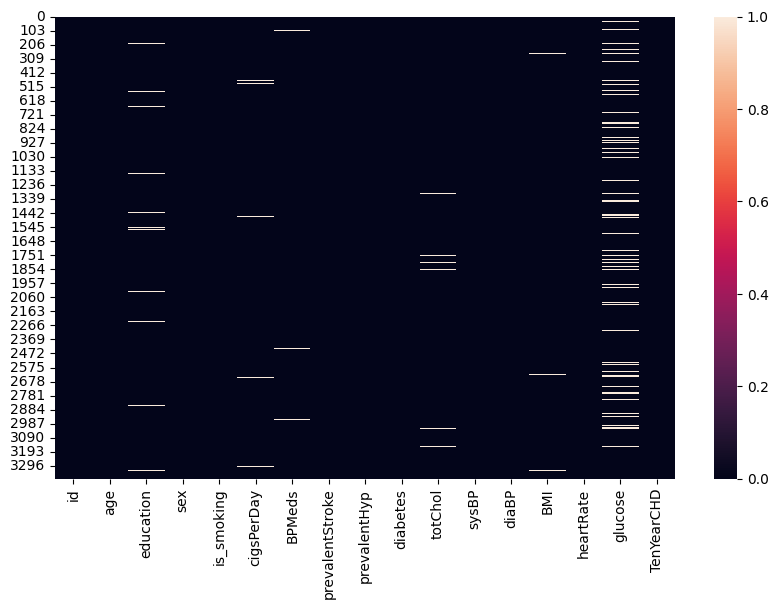

In [10]:
# Visualizing the missing values using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull())
plt.show()


### What did you know about your dataset?

I've been tasked with analyzing a dataset from a cardiovascular study conducted on residents of Framingham, Massachusetts. The dataset comprises 3390 rows and 17 features. It's worth noting that there are no duplicate values present, although several features contain null values. However, the percentage of null values is minimal and manageable.

These features provide extensive information about the patients, including their age, education, gender, smoking habits, usage of blood pressure medication, cholesterol levels, diabetes status, blood pressure, BMI, glucose levels, and heart rate. Utilizing this wealth of information, our objective is to construct a predictive model capable of assessing the likelihood of a patient developing Coronary Heart Disease within the next 10 years.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [12]:
# Dataset Describe
data.describe(include='all')

id          age    education   sex is_smoking   cigsPerDay  \
count   3390.000000  3390.000000  3303.000000  3390       3390  3368.000000   
unique          NaN          NaN          NaN     2          2          NaN   
top             NaN          NaN          NaN     F         NO          NaN   
freq            NaN          NaN          NaN  1923       1703          NaN   
mean    1694.500000    49.542183     1.970936   NaN        NaN     9.069477   
std      978.753033     8.592878     1.019081   NaN        NaN    11.879078   
min        0.000000    32.000000     1.000000   NaN        NaN     0.000000   
25%      847.250000    42.000000     1.000000   NaN        NaN     0.000000   
50%     1694.500000    49.000000     2.000000   NaN        NaN     0.000000   
75%     2541.750000    56.000000     3.000000   NaN        NaN    20.000000   
max     3389.000000    70.000000     4.000000   NaN        NaN    70.000000   

             BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count   3346.000000      3390.000000   3390.000000  3390.000000  3352.000000   
unique          NaN              NaN           NaN          NaN          NaN   
top             NaN              NaN           NaN          NaN          NaN   
freq            NaN              NaN           NaN          NaN          NaN   
mean       0.029886         0.006490      0.315339     0.025664   237.074284   
std        0.170299         0.080309      0.464719     0.158153    45.247430   
min        0.000000         0.000000      0.000000     0.000000   107.000000   
25%        0.000000         0.000000      0.000000     0.000000   206.000000   
50%        0.000000         0.000000      0.000000     0.000000   234.000000   
75%        0.000000         0.000000      1.000000     0.000000   264.000000   
max        1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count   3390.00000  3390.000000  3376.000000  3389.000000  3086.000000   
unique         NaN          NaN          NaN          NaN          NaN   
top            NaN          NaN          NaN          NaN          NaN   
freq           NaN          NaN          NaN          NaN          NaN   
mean     132.60118    82.883038    25.794964    75.977279    82.086520   
std       22.29203    12.023581     4.115449    11.971868    24.244753   
min       83.50000    48.000000    15.960000    45.000000    40.000000   
25%      117.00000    74.500000    23.020000    68.000000    71.000000   
50%      128.50000    82.000000    25.380000    75.000000    78.000000   
75%      144.00000    90.000000    28.040000    83.000000    87.000000   
max      295.00000   142.500000    56.800000   143.000000   394.000000   

         TenYearCHD  
count   3390.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.150737  
std        0.357846  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

from matplotlib import pyplot as plt
_df_23['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['education'].plot(kind='hist', bins=20, title='education')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['cigsPerDay'].plot(kind='hist', bins=20, title='cigsPerDay')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_27.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_28.groupby('is_smoking').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='id', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30.plot(kind='scatter', x='age', y='education', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31.plot(kind='scatter', x='education', y='cigsPerDay', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32.plot(kind='scatter', x='cigsPerDay', y='BPMeds', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_34['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_35['education'].plot(kind='line', figsize=(8, 4), title='education')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_36['cigsPerDay'].plot(kind='line', figsize=(8, 4), title='cigsPerDay')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['is_smoking'].value_counts()
    for x_label, grp in _df_37.groupby('sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sex')
_ = plt.ylabel('is_smoking')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_38['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_38, x='id', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_39['is_smoking'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_39, x='id', y='is_smoking', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_40['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_40, x='age', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_41['is_smoking'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_41, x='age', y='is_smoking', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### Variables Description

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* **id**: Unique id of each Patient
* **AGE**: Age of Patient
* **Educarion**: Education of Patient
* **Sex** : Gender of Patient
* **is_smoking** : Whether the Patient is Smoker or not
* **CigsPerDay**: If Patient is smoker then how many Cigrattes Patient smokes per day
* **BPMeds**: Whether the Patient is taking BP medicines or not
* **prevalentStroke**: Whether the Patient has prevalant score or not
* **prevalentHyp** : Whether the Patient has Hypertension or not
* **Diabets** : Whether the Patient is diabetic or not
* **totchol** : Cholestrol Level of Patient
* **sysBP** : BP Measure
* **diaBP** : BP Measure
* **BMI** : Boday Mass Index of Patient
* **Heartrate** : HeartRate of Patient
* **Glucose** : Glucose level of Patient
* **TenYearCHD** :Target Variable we need to predict what is the chances of getting CHD for next 10 years




### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
unique_val=data.apply(lambda col:col.unique())
print(unique_val)
print('--'*30)
print('Unique Value Count')
unique_val_count=data.apply(lambda col:col.nunique())
print(unique_val_count)


id                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
age                [64, 36, 46, 50, 61, 41, 55, 53, 43, 44, 58, 5...
education                                  [2.0, 4.0, 1.0, 3.0, nan]
sex                                                           [F, M]
is_smoking                                                 [YES, NO]
cigsPerDay         [3.0, 0.0, 10.0, 20.0, 30.0, 35.0, 40.0, 15.0,...
BPMeds                                               [0.0, nan, 1.0]
prevalentStroke                                               [0, 1]
prevalentHyp                                                  [0, 1]
diabetes                                                      [0, 1]
totChol            [221.0, 212.0, 250.0, 233.0, 241.0, 272.0, 238...
sysBP              [148.0, 168.0, 116.0, 158.0, 136.5, 182.0, 232...
diaBP              [85.0, 98.0, 71.0, 88.0, 121.0, 136.0, 68.0, 7...
BMI                [nan, 29.77, 20.35, 28.26, 26.42, 32.8, 24.83,...
heartRate          [90.0, 72.0, 88

## 3. ***Data Wrangling***

### Data Wrangling Code

**Null Value Treatment**

In [15]:
#let's first create a copy of data
df=data.copy()

for filling missing values i have visualizing all the features

In [16]:
#Fill the missing value present in Education column with mode
df['education'].fillna(df['education'].mode()[0],inplace=True)

In [17]:
#Fill the missing value present in "cigsPerDay" with mean value
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(),inplace=True)

In [18]:
#filling the missing value present in "BPMeds" columns with mode value i,e 0
df['BPMeds'].fillna(0,inplace=True)

In [19]:
#fill the missing value present on "totchol" with median
df['totChol'].fillna(df['totChol'].median(),inplace=True)

In [20]:
#Filling the missing value in "BMI" column with median value 0
df['BMI'].fillna(df['BMI'].median(),inplace=True)

In [21]:
#There is only one missing value present in "heartRate" column let's fill it with mode value
df['heartRate'].fillna(75,inplace=True)

In [22]:
#Filling missing values present in "glucose" with median value
df['glucose'].fillna(df['glucose'].median(),inplace=True)

In [23]:
#let's us drop id column from our data-set
df.drop(columns='id',inplace=True)

**Outlier Treatment**

In [24]:
#find categorical features in dataset
categorical_col=[col for col in df.columns if df[col].dtype=='O']
print(f'There are {len(categorical_col)} Categorical Columns i,e {categorical_col}')

There are 2 Categorical Columns i,e ['sex', 'is_smoking']


In [25]:
#find numerical feature in dataset
numerical_col=[col for col in df.columns if df[col].dtype!='O']
print(f'There are {len(numerical_col)} Numerical Columns i,e {numerical_col}')

There are 14 Numerical Columns i,e ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [26]:
#Find Discrete Features from numerical Columns
discrete_col = []
for var in numerical_col:
    if len(df[var].unique())<10:
      discrete_col.append(var)

print(f'There are {len(discrete_col)} discrete variables i,e {discrete_col}')

There are 6 discrete variables i,e ['education', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


In [27]:
#Find continous Features from numerical Columns
continous_col = []
for var in numerical_col:
    if len(df[var].unique())>10:
      continous_col.append(var)

print(f'There are {len(continous_col)} continous variables i,e {continous_col}')

There are 8 continous variables i,e ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


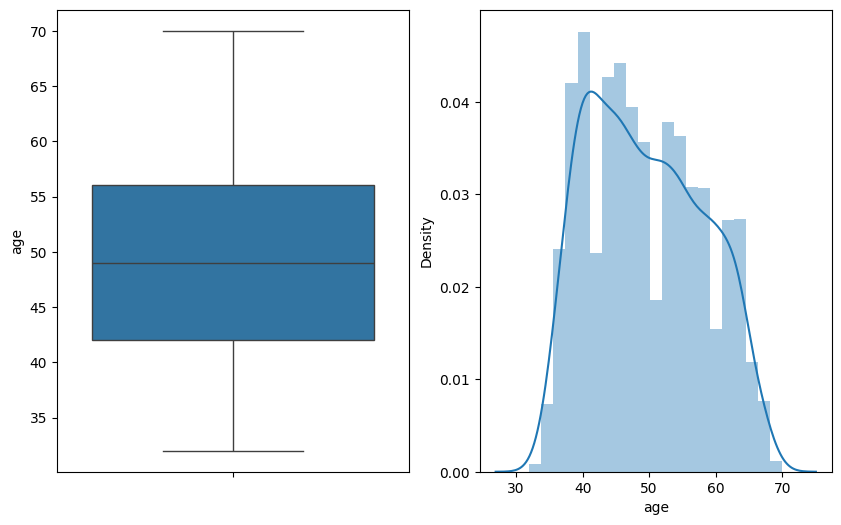

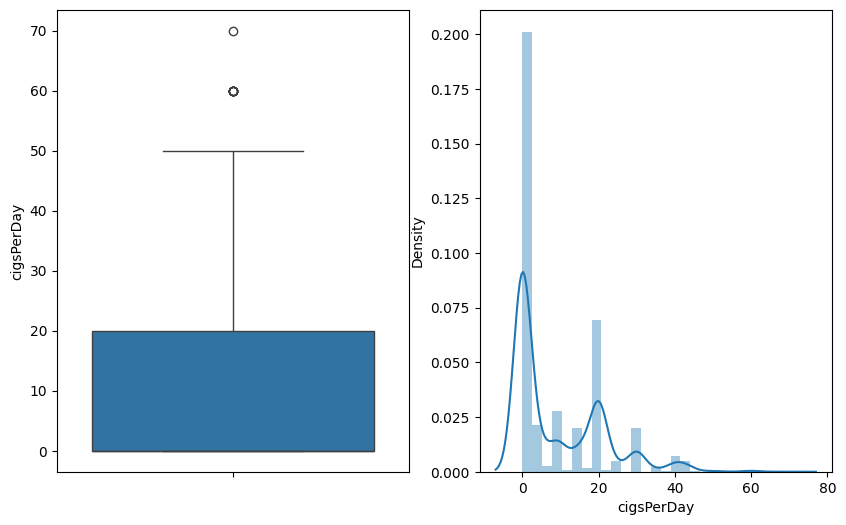

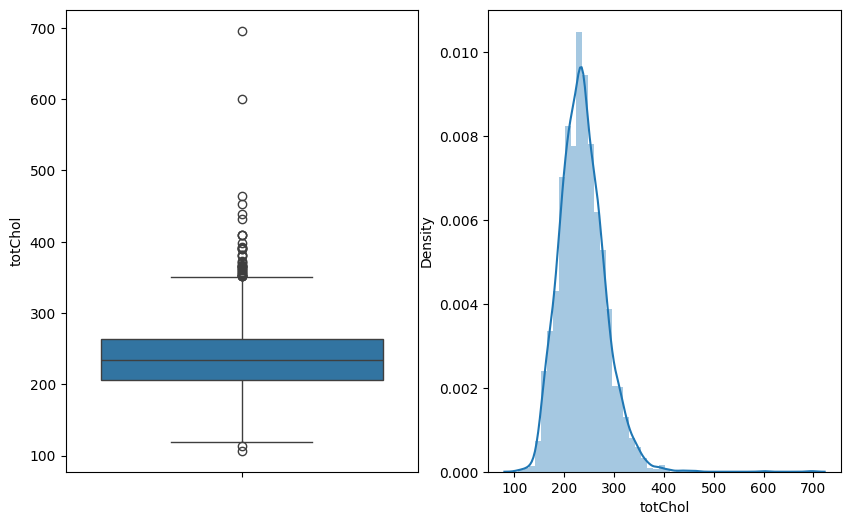

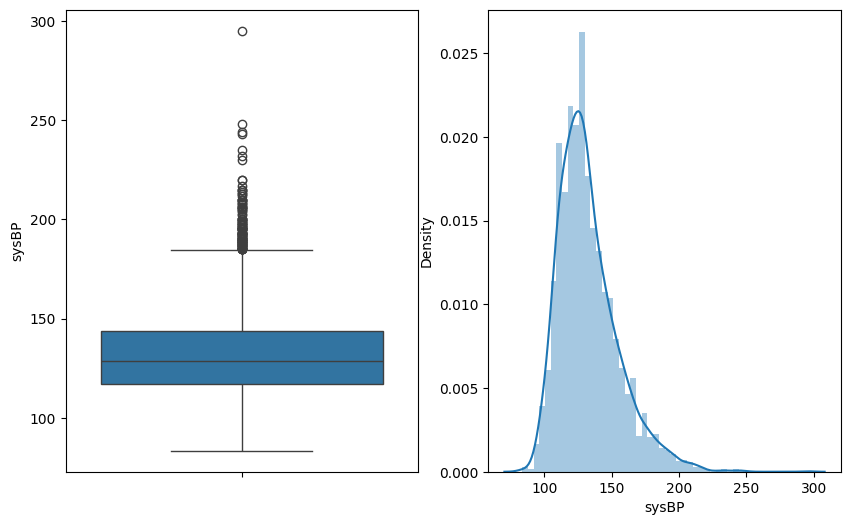

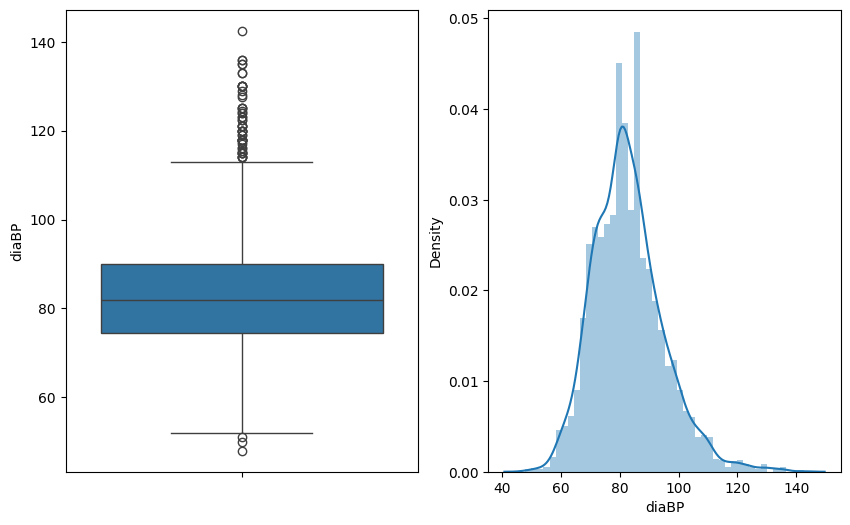

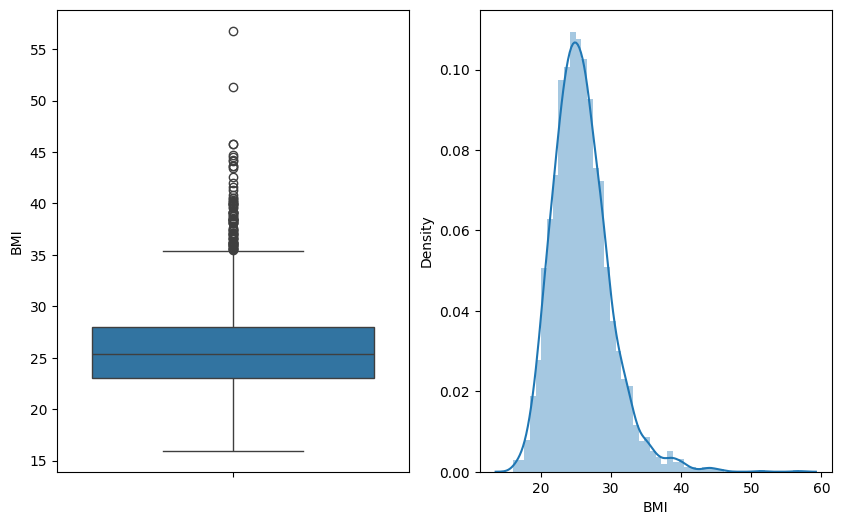

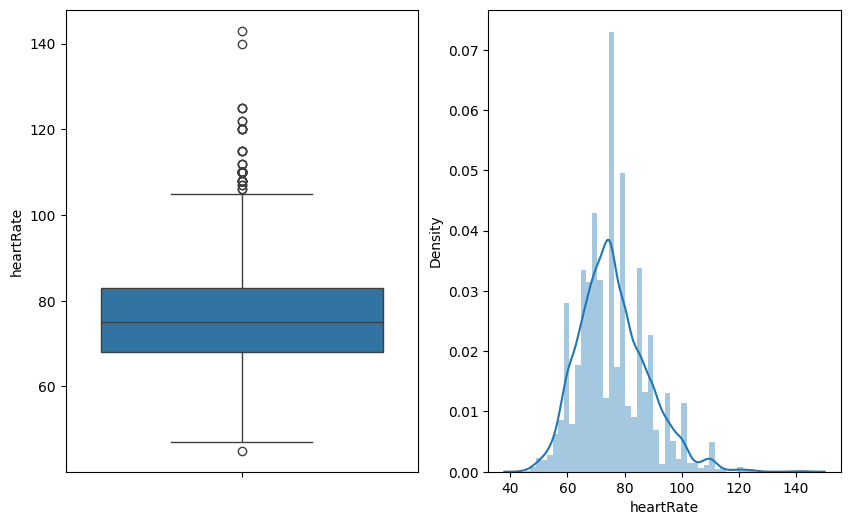

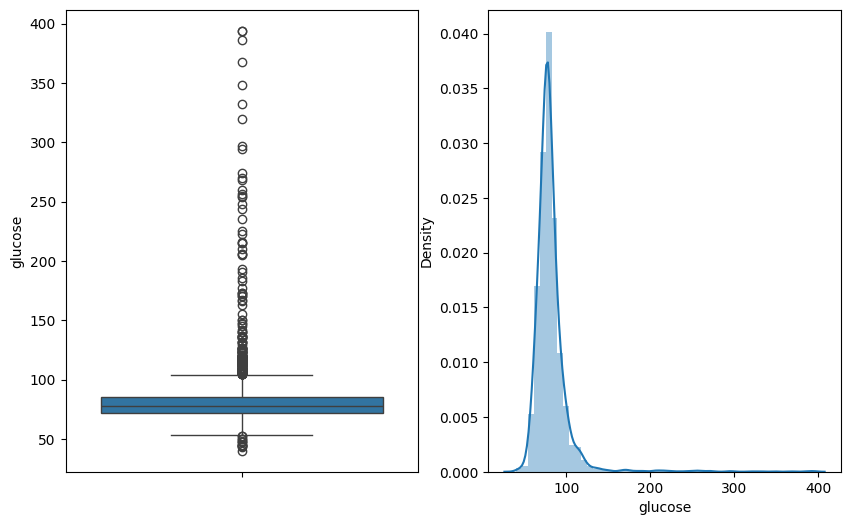

In [28]:
#lets find out the outliers and distribution of continous columns
for col in continous_col:
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  fig=sns.boxplot(df[col])
  fig.set_ylabel(col)

  plt.subplot(1,2,2)
  fig=sns.distplot(df[col])
  fig.set_xlabel(col)

  plt.show()


Since it is a health related problem so removing outliers won't be good option as in this process we may loose some valuable information

### What all manipulations have you done and insights you found?

* Initially, I duplicated the data frame to ensure data integrity, proceeding to handle missing values across all columns by imputing them with either the mode, median, or mean depending on the requirement and data distribution.

* Subsequently, I omitted the 'id' column from the data frame as it was deemed unnecessary for the analysis.

* Next, I categorized all features into three groups: categorical, continuous (numerical), and discrete (numerical) columns to facilitate subsequent analysis.

* Lastly, I examined outliers and assessed the distribution of all continuous numerical columns.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# Chart 1

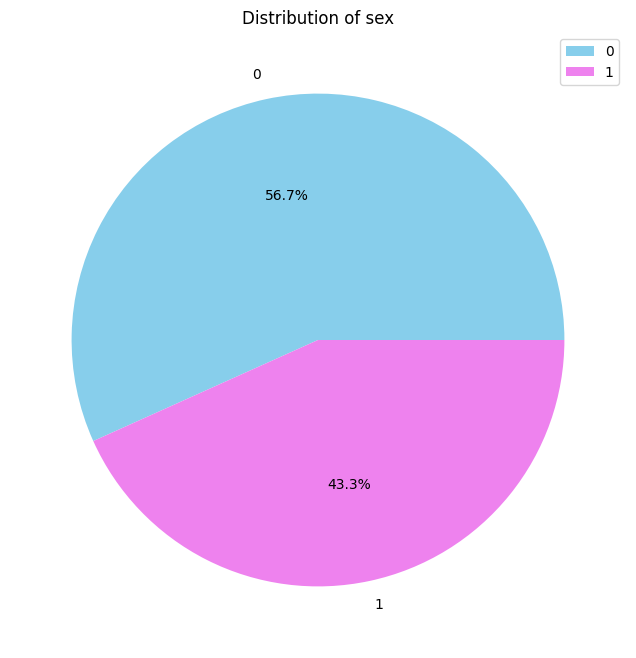

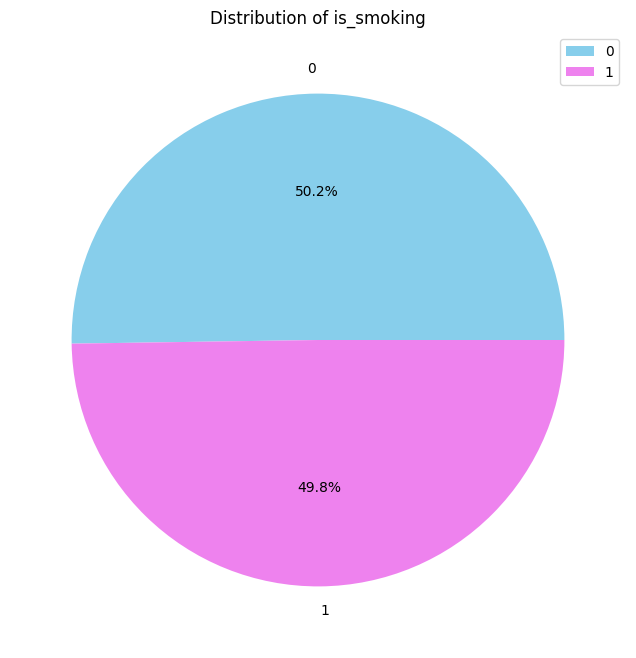

In [30]:
import matplotlib.pyplot as plt

# Define sky blue and violet colors
colors = ['skyblue', 'violet']

for idx, col in enumerate(categorical_col):
    plt.figure(figsize=(8,8))
    plt.pie(df[col].value_counts(), autopct='%1.1f%%', labels=['0', '1'], colors=colors)
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()

##### 1. Why did you pick the specific chart?

I have used pie chart to find out distribution of data in different category in categorical columns of data-frame

##### 2. What is/are the insight(s) found from the chart?

From the pie chart it was found that:
* 56.7% of patient's Gender is Female in our dataset
* 49.8% patients are smokers

#### Chart - 2

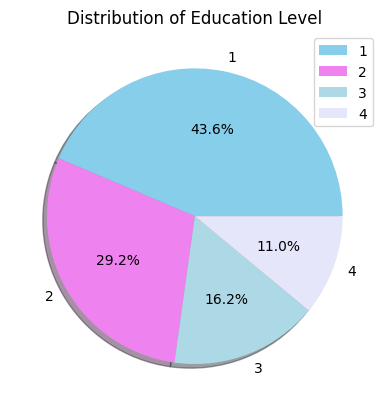

In [31]:
# Chart - 2 visualization code
#univeriate Analysis

plt.pie(df['education'].value_counts(), labels=[1,2,3,4], autopct='%1.1f%%', shadow=True, colors=['skyblue', 'violet', 'lightblue', 'lavender'])
plt.title('Distribution of Education Level')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

I have picked Pie chart to find out the distribution of Education level in the dataset

##### 2. What is/are the insight(s) found from the chart?

It can be seen from the graph that 41% of the patient has level-1 and around 31.8% of the patient has Level-2 Education and around 16.2% of the patient has Level-3 and remaining 11% has level-4 Education

#### Chart - 3

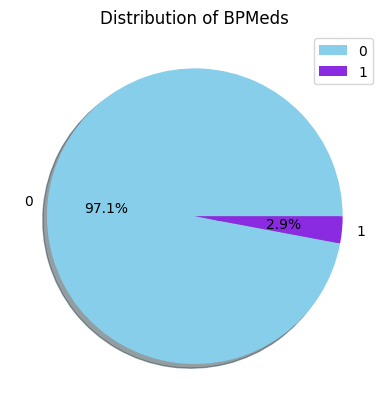

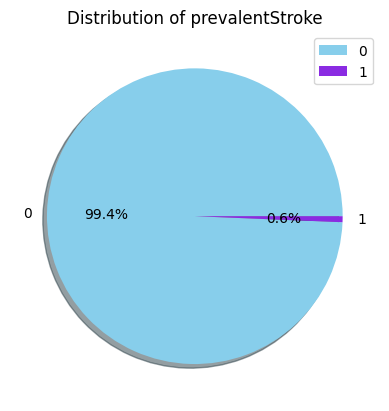

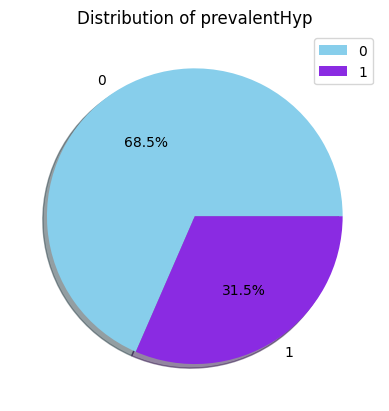

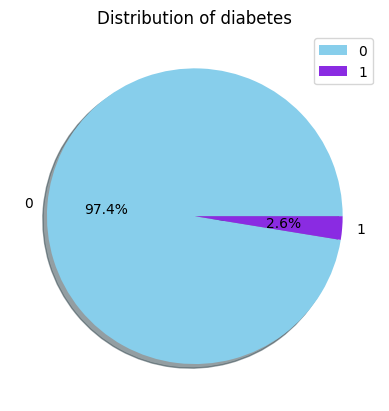

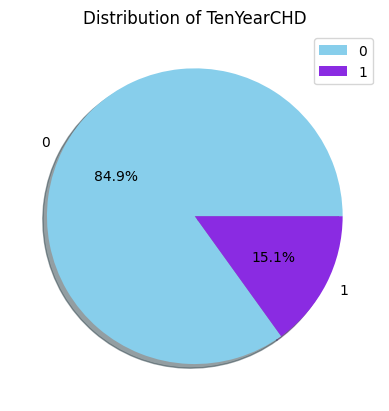

In [33]:
# Chart - 3 visualization code
#univeriate Analysis

import matplotlib.pyplot as plt

# Define colors
colors = ['#87CEEB', '#8A2BE2']  # Sky blue and violet shades

for col in discrete_col:
    if col != 'education':
        plt.pie(df[col].value_counts(), autopct='%1.1f%%', labels=[0, 1], shadow=True, colors=colors)
        plt.title(f'Distribution of {col}')
        plt.legend()
        plt.show()


##### 1. Why did you pick the specific chart?

I have picked Pie chart to find out the distribution of discrete columns

##### 2. What is/are the insight(s) found from the chart?

From the graph it can be analysed that:
* only **2.9%** of the patient are taking BP medicines
* only **0.6%** of the patient has prevalent Stroke
* Around **31.5%** of the patients has prevalent Hypertension
* only **2.6 %** of the patients has Diabetes
* Only **15.1%** of the patients has a chance of getting cardio-vascular disease in next 10 years

#### Chart - 4

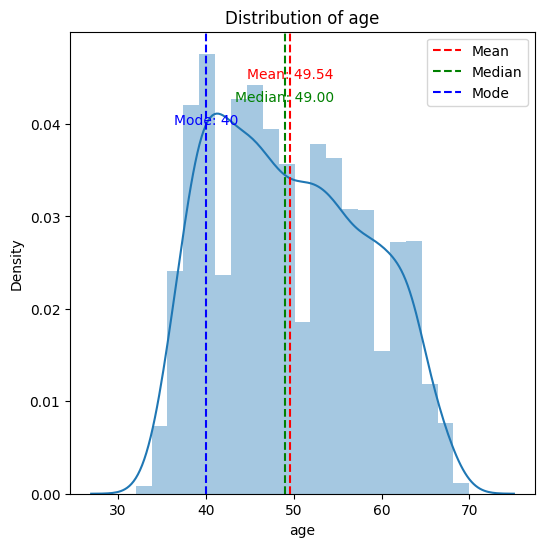

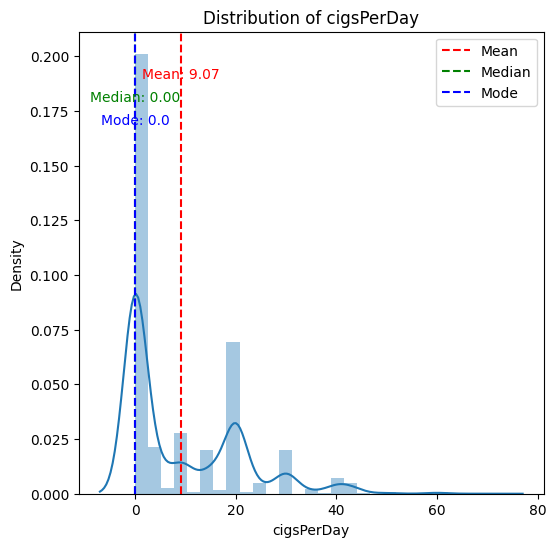

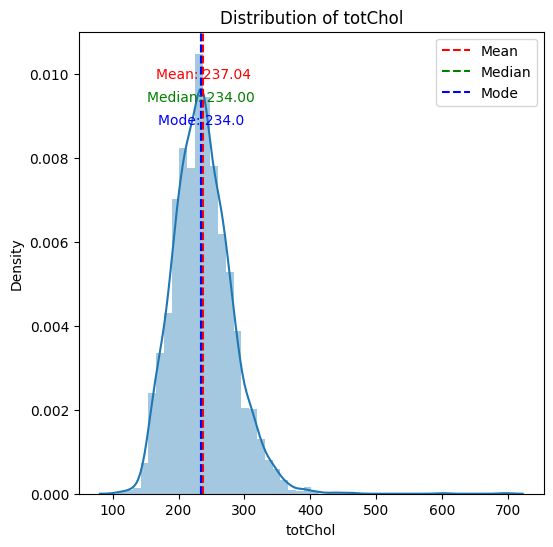

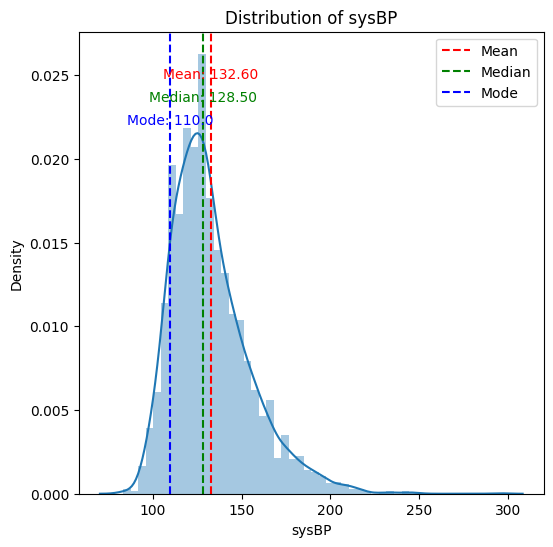

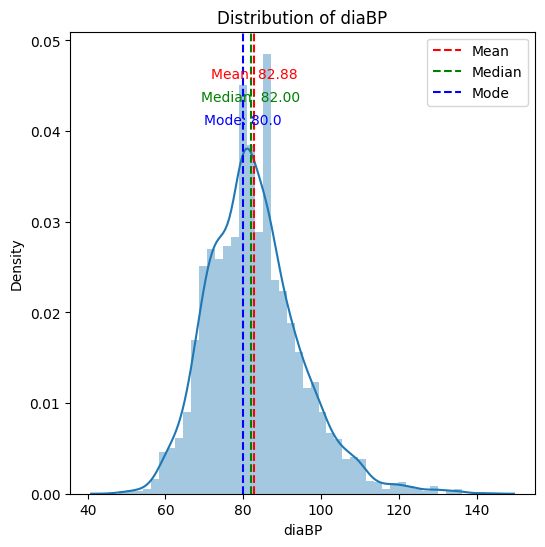

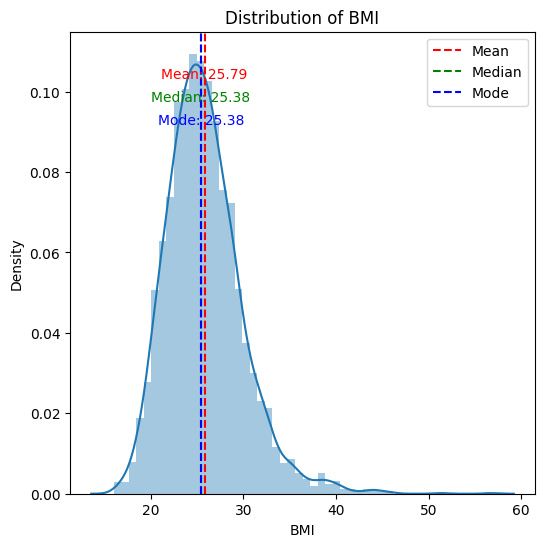

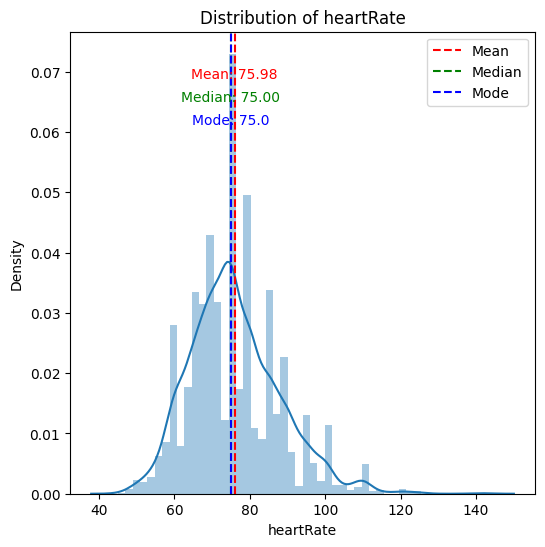

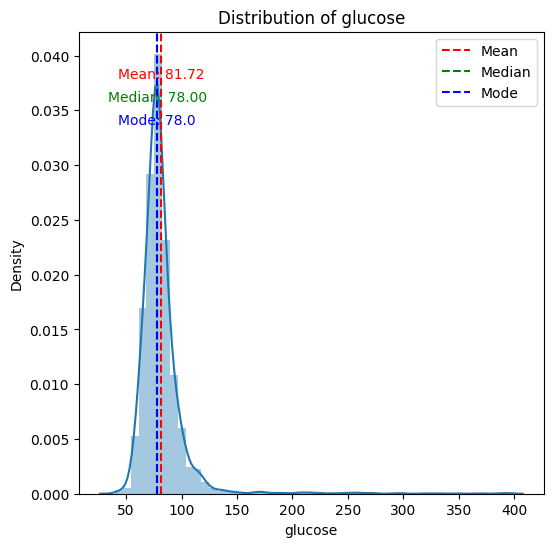

In [ ]:
# Chart - 4 visualization code
#univeriate analysis

for col in continous_col:
  plt.figure(figsize=(6, 6))
  sns.distplot(df[col])
  plt.axvline(df[col].mean(), color='r', linestyle='--', label='Mean')
  plt.axvline(df[col].median(), color='g', linestyle='--', label='Median')
  plt.axvline(df[col].mode()[0], color='b', linestyle='--', label='Mode')
  plt.title(f'Distribution of {col}')
  plt.legend()
  plt.text(df[col].mean(), plt.ylim()[1] * 0.9, f'Mean: {df[col].mean():.2f}', color='r', ha='center')
  plt.text(df[col].median(), plt.ylim()[1] * 0.85, f'Median: {df[col].median():.2f}', color='g', ha='center')
  plt.text(df[col].mode()[0], plt.ylim()[1] * 0.8, f'Mode: {df[col].mode()[0]}', color='b', ha='center')
  plt.show()

##### 1. Why did you pick the specific chart?

I have used distplot to find out the distribution of each continous feature with mean,median and mode

##### 2. What is/are the insight(s) found from the chart?

From the above graph it can be analysed that:
* Age of Majority of the patient are in the range of **40-50**
* Very high portion of the population smokes less than **9 cigrattes per day**  
* The **normal Total Cholestrol range** in humans is consideres to be in the range **200 to 240 mg/dl**.In our case  the  Cholestrol distribution of the population is normally distributed with average value of cholestrol **234 mg/dl** and on an average the cholestrol level of the population lies within the range of 200-250 mg/dl which is considered to be normal but there is very huge portion of the population around **32%** having Cholestrol measure greater than **250 mg/dl** which is considered to be high.
* The **normal range** of systolic Bp should be below **130 mmhg** and in our dataset around **45%** of the popuolation  has sysBP above 130 mmhg which is the cause of **hypertension**
* The **normal range** of diaBP in human is **80-89 mmhg** above which can cause hypertion.From the graph it can be seen that the diaBP of population is almost normally distributed with mean diaBp of around **82 mmhg**.There are very less portion of population which has diaBP more than **90 mmhg** or less than 70 mmgh
* The Normal BMI in humans should be between **18-25**.In our dataset aroud **45%** of the population has **Normal BMI value** .A value **less than 18** is considered to be **Under Weight** and a value in the range **25-30** is considered to be **Over-weight**.In our data set there are very few patients whose weight is less than 18 and there is a large portion of population around **44%** whose BMI is in range **25-30** and The values **greater than 30** is consideres to be **Obese**.Around **10%** of the patients in our dataset comes under that range
* The heart rate distribution is normally distributed with heart rate of majority of population ranges between **60 to 100 bpm** and with average rate of **75 bpm**
* The Glucose of the population is normally distributed with range between **60 to 100 mg/dl** .There are very few patients with glucose level greater than 100 mg/dl i,e they might be having Diabetes

#### Chart - 5

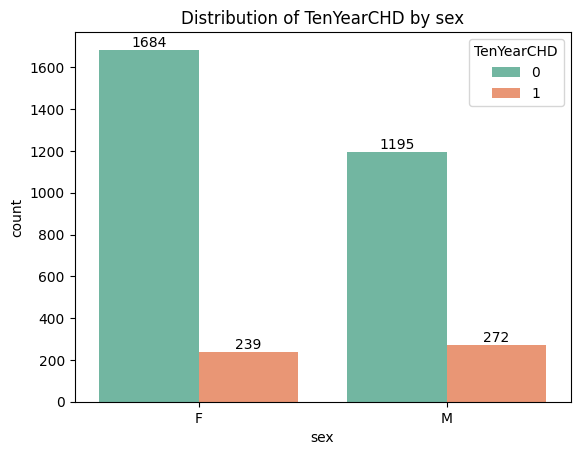

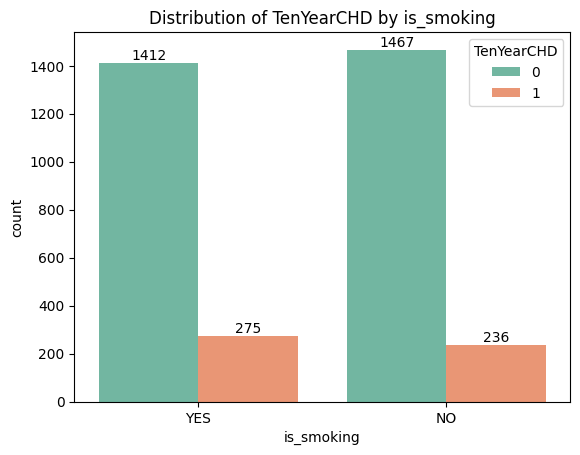

In [ ]:
# Chart - 5 visualization code
#Bivaraite
for col in categorical_col:
    plt.figure()
    ax = sns.countplot(data=df, x=col, hue='TenYearCHD', palette='Set2')
    plt.title(f'Distribution of TenYearCHD by {col}')
    plt.legend(title='TenYearCHD')
    for p in ax.patches:
        height = p.get_height()
        plt.annotate(format(height, '.0f'), (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.show()

##### 1. Why did you pick the specific chart?

I have used used count plot to find out the distribution of find out the distribution of catergorical columns with target column

##### 2. What is/are the insight(s) found from the chart?

From the graph it can be analysed that:
* **18.5%** of the **Male patients** and **12.4% of Female patients** have chances of getting the Disease
* Around **16.3%** of the patients who are **smokers** and **13.8%** of the **non-smoker** patients have chances of getting the disease


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

So Male patiens and smoker patients are at the risk of suffering with the Disease

#### Chart - 6

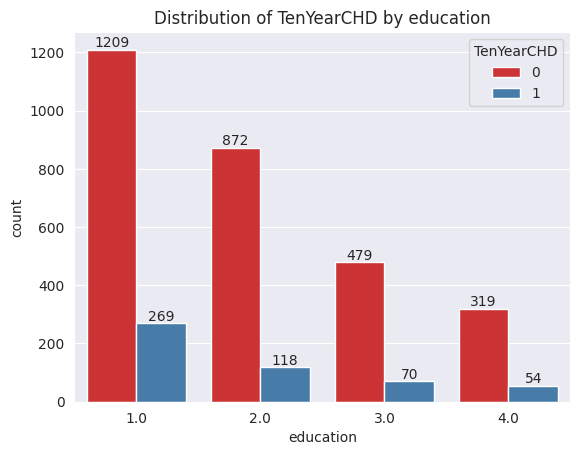

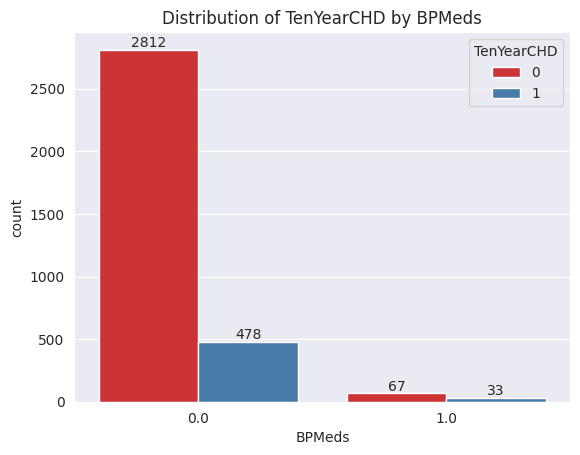

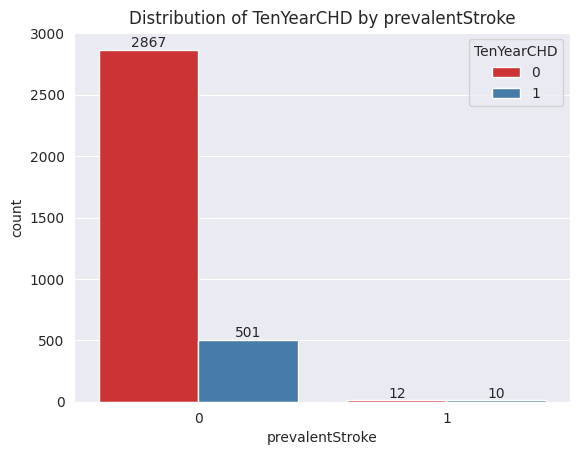

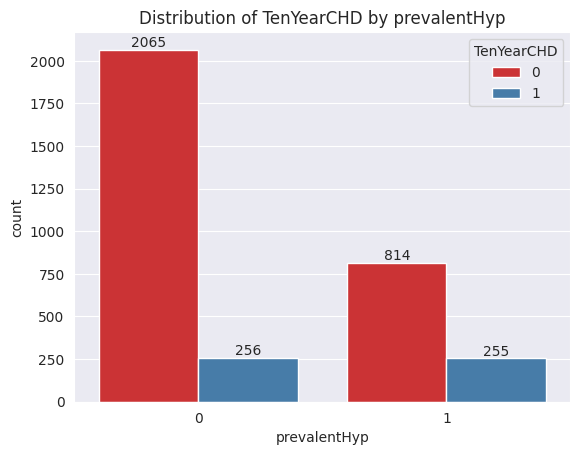

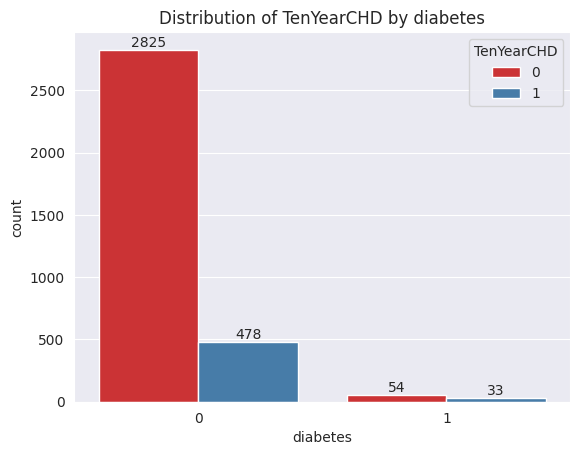

In [ ]:
# Chart - 6 visualization code
#BiVariate Analysis
sns.set_style('darkgrid')
for col in discrete_col:
    if col !='TenYearCHD':
      plt.figure()
      ax = sns.countplot(data=df, x=col, hue='TenYearCHD', palette='Set1')
      plt.title(f'Distribution of TenYearCHD by {col}')
      plt.legend(title='TenYearCHD')
      for p in ax.patches:
          height = p.get_height()
          plt.annotate(format(height, '.0f'), (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.show()

##### 1. Why did you pick the specific chart?

I have used count plot to find out the distribution of discrete column with target column

##### 2. What is/are the insight(s) found from the chart?

From the graph it can be analysed that:
* People at **Education Level 1** have more chances of getting the disease than other Education Level
* Around **15%** of the patients who are **not taking BPmeds** and around** 33%** of the patients who are **taking medicines** have chances of suffering with the Disease,so patients having blood pressure issure are more prone to disease
* Around **15%** of the patients who are **not suffering with prevalent Stroke** and around **45%** of the patients who are **suffering with prevalent stroke** have chances of suffering with the disease,so patients suffering with the stroke have more chances of suffering with the disease similarly patients suffering with the prevalent hypertension are more prone to suffer with the disease
* Around **38%** of the patients suffering **with Diabetes** and around **15%** of the patients **not having Diabetes** are having more chances of suffering with the disease,so patients having Diabetes are at the risk of suffing with CardioVascular Disease



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

So patients who are already having Blood Pressure Issues, already suffering with prevalent and hypervalent strokes and having Diabetes are at the risk of suffering with CardioVascular Disease

#### Chart - 7

<Figure size 1000x600 with 0 Axes>

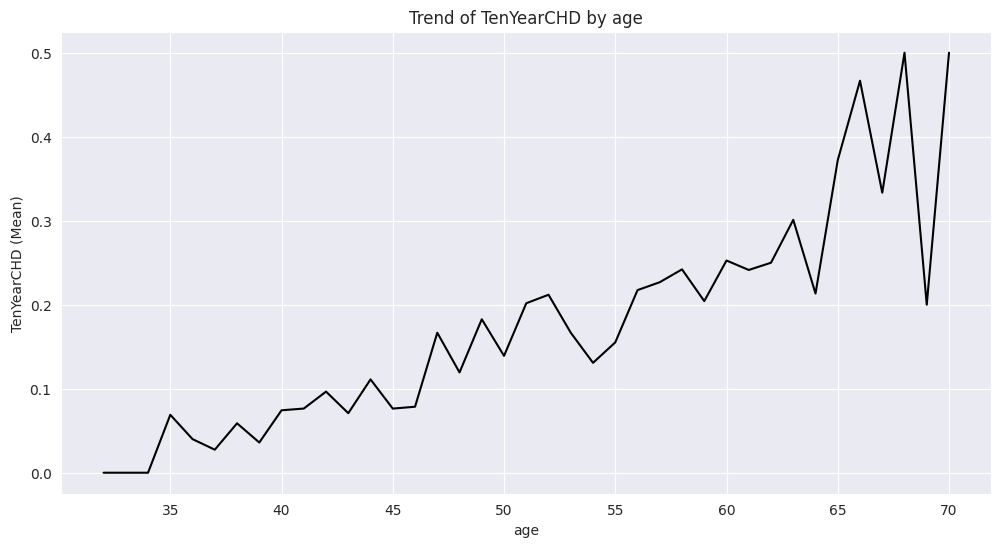

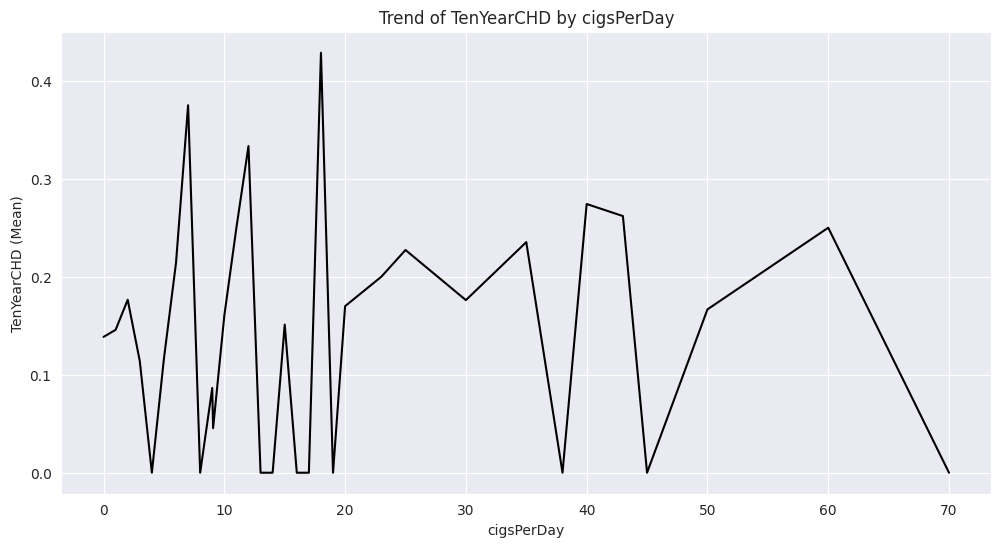

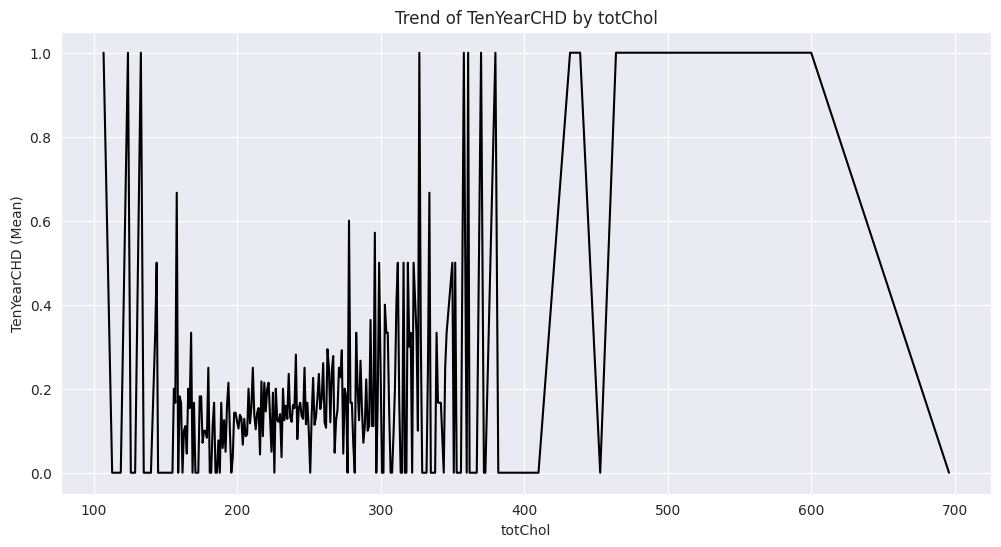

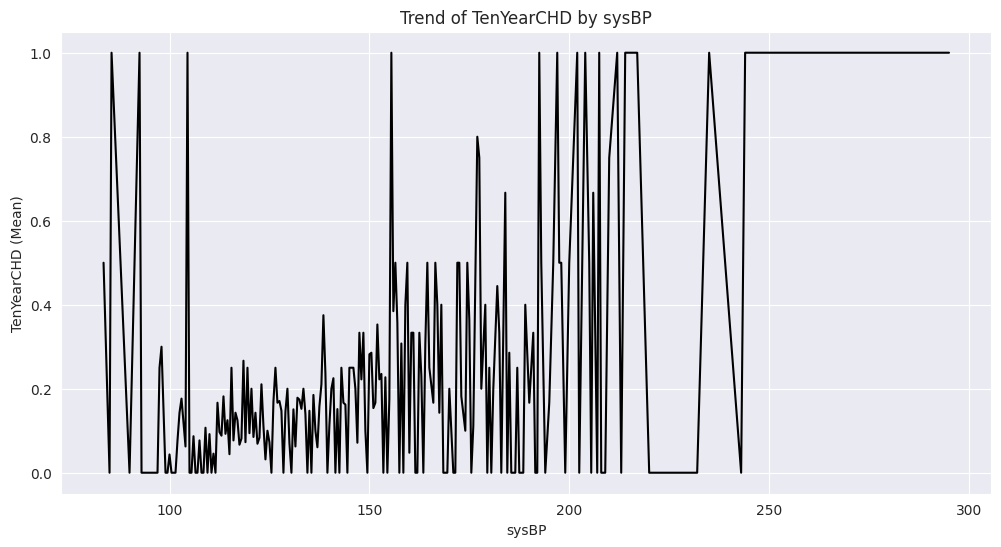

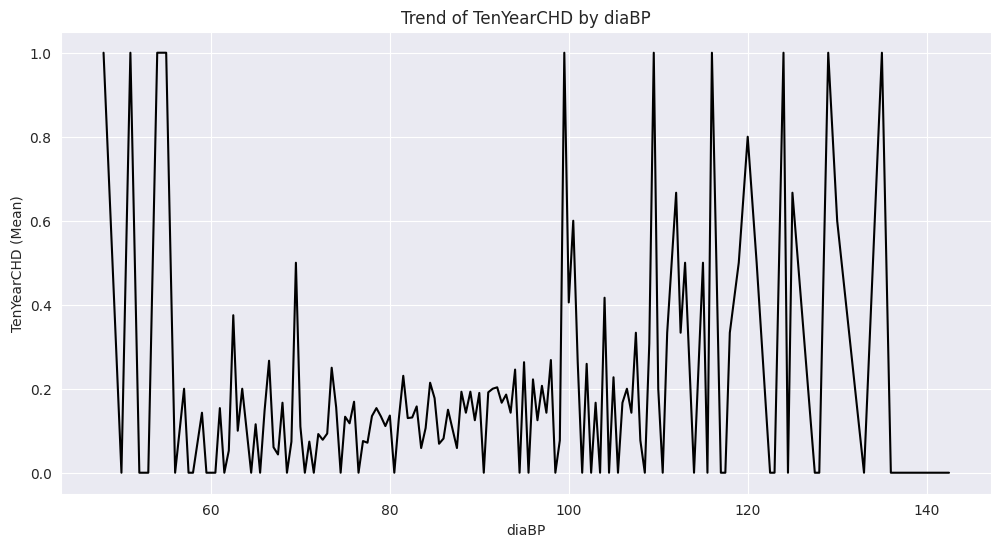

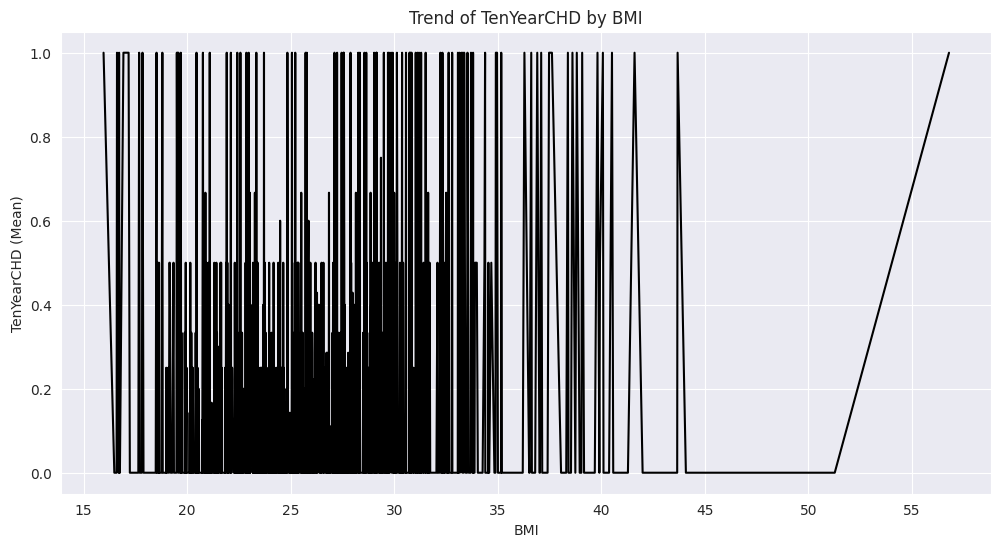

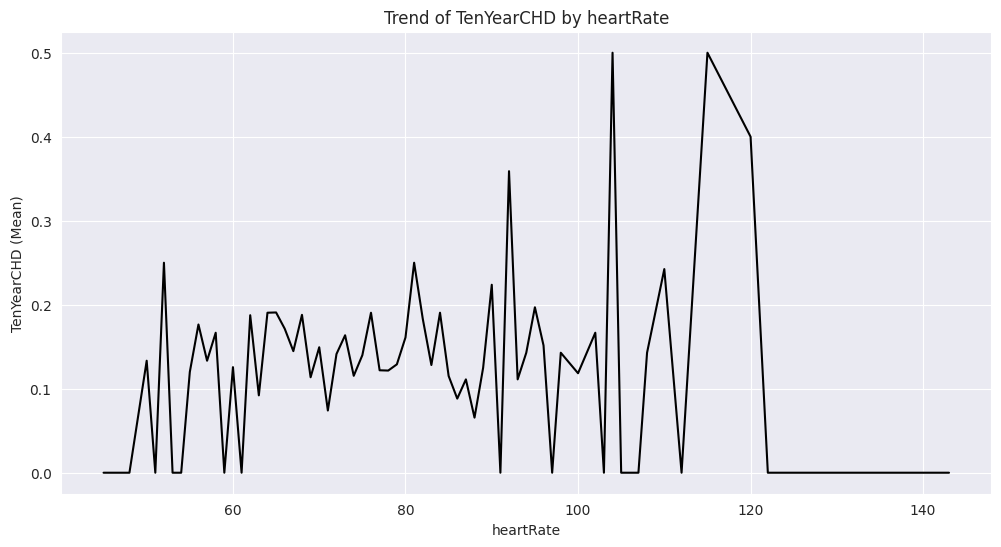

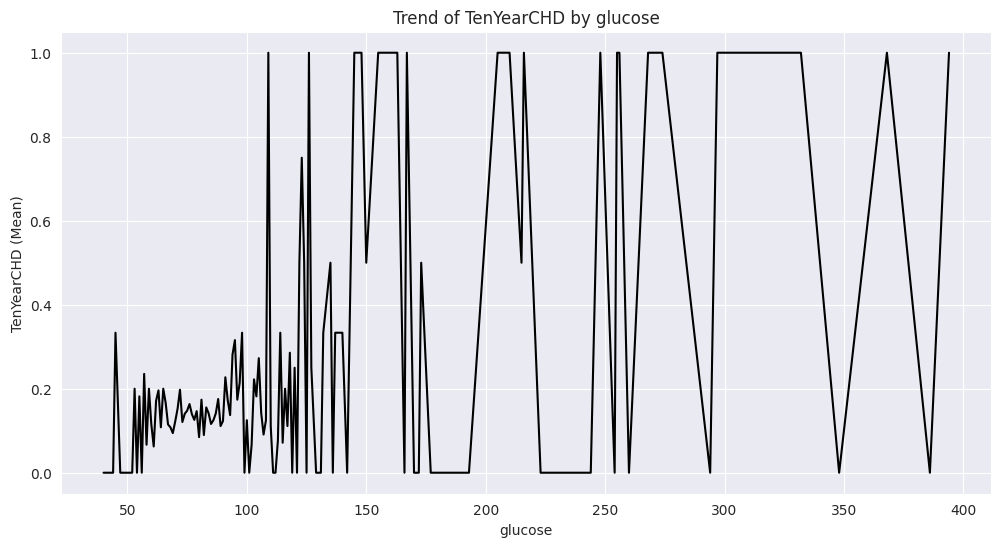

In [ ]:
# Chart - 7 visualization code
#bi variate analysis
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
for col in continous_col:
    plt.figure(figsize=(12,6))
    group_data = df.groupby(col)['TenYearCHD'].mean()  # Or use .median()
    plt.plot(group_data.index, group_data.values,color='black')
    plt.xlabel(col)
    plt.ylabel('TenYearCHD (Mean)')
    plt.title(f'Trend of TenYearCHD by {col}')
    plt.show()

##### 1. Why did you pick the specific chart?

I have plotted line plot to find out the trend of continous col with target feature

##### 2. What is/are the insight(s) found from the chart?

From the graph it can be analysed that:
* The risk of CardioVascular disease is increasing with incresing in age
* The more the patients is consuming the ciggrattes per day more is the risk of CHD increasing
* Patients having Cholestrol greater than 300 mg/dl and less than 150 mg/dl are having more chances of getting the disease'
* Patients having systolic Bp greater than 150 mmhg and less than 110 mmhg are having more chances of getting the disease
*Patients having dia-Bp greater than 100 mmhg and less than 70 mmhg are having more chances of getting the disease
* There is not a specific BMI which can lead to CHD but it can seen that patients with overweight and obese conditions i.e BMI >25 are have little more risk of getting CHD in future
* Patients having heart rate more than 90 are having little more risk of getting the disease
* Patients having glucose level greater than normal level i.e 100 mg/dl are having more risk of getting the disease


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As the person grows older he/she should try maintain healthy weight and try to eat healthy diet,Getting regular exercise,quitting smoking and it is important to maintain high blood pressure,high cholestrol or diabetes

#### Chart - 8

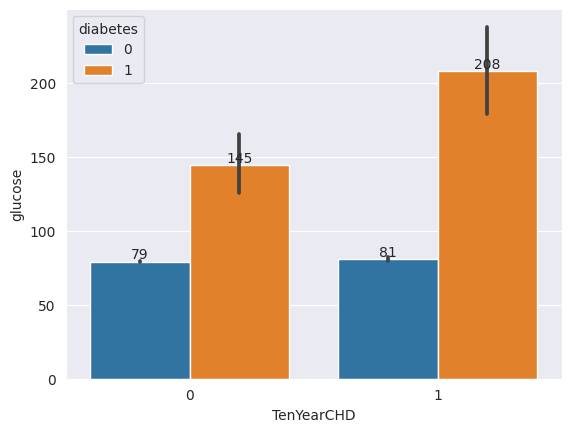

In [ ]:
# Chart - 8 visualization code
#Multivariant Analysis
ax=sns.barplot(x=df['TenYearCHD'],y=df['glucose'],hue=df['diabetes'])
for p in ax.patches:
  height = p.get_height()
  plt.annotate(format(height, '.0f'), (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

I have plotted barplot to find out the multivaraint analysis between the glucose,TenYearCHD and diabetes

##### 2. What is/are the insight(s) found from the chart?

from the graph it can be analysed that patients Daibetes patients are having more glucose level and are more prone to CHD

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Patients with daibetes should keep the Sugar level under control

#### Chart - 9

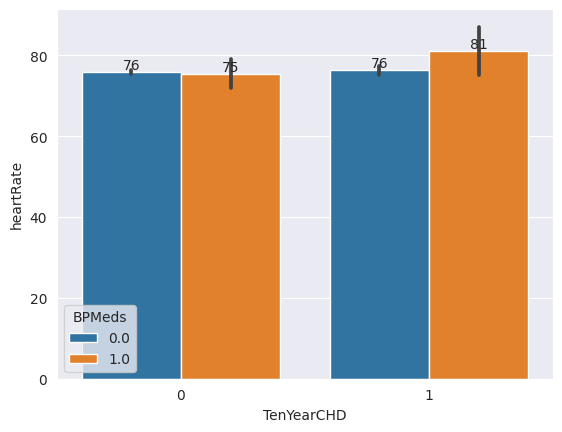

In [ ]:
# Chart - 9 visualization code
#Multivariant Analysis
ax=sns.barplot(x=df['TenYearCHD'],y=df['heartRate'],hue=df['BPMeds'])
for p in ax.patches:
  height = p.get_height()
  plt.annotate(format(height, '.0f'), (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

I have plotted barplot to find out the multivariant analysis between the heartRate,TenYearCHD and BP-Meds

##### 2. What is/are the insight(s) found from the chart?

From the graph it can be analysed that patients with high heartRate and Blood pressure issues more is the risk of suffering with the disease

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Taking BPMeds and keeping track of BP is required

#### Chart - 10

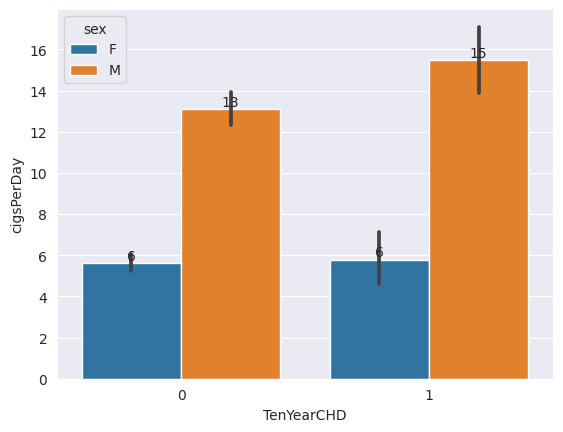

In [ ]:
# Chart - 10 visualization code
#Multivariate Analysis
ax=sns.barplot(x=df['TenYearCHD'],y=df['cigsPerDay'],hue=df['sex'])
for p in ax.patches:
  height = p.get_height()
  plt.annotate(format(height, '.0f'), (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

I have plotted barplot to find out the multivariant analysis between the cigsPerday,TenYearCHD and sex

##### 2. What is/are the insight(s) found from the chart?

Male Patients consuming more ciggrates per day are at high risk of suffering with the disease

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Quitting smoking is best option to prevent the risks of CHD

#### Chart - 11

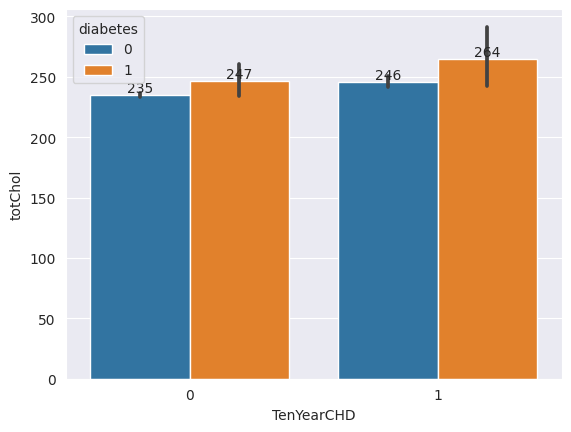

In [ ]:
# Chart - 11 visualization code
#Multivariate Analysis
ax=sns.barplot(x=df['TenYearCHD'],y=df['totChol'],hue=df['diabetes'])
for p in ax.patches:
  height = p.get_height()
  plt.annotate(format(height, '.0f'), (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

I have plotted barplot to find out the multivariant analysis between the totChol,TenYearCHD and Diabetes

##### 2. What is/are the insight(s) found from the chart?

Patients with diabetes have high cholestrol measure are at more risk of getting the CHD

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Lowering Cholestrol Level and keeping sugar level under control

#### Chart - 14 - Correlation Heatmap

<Axes: >

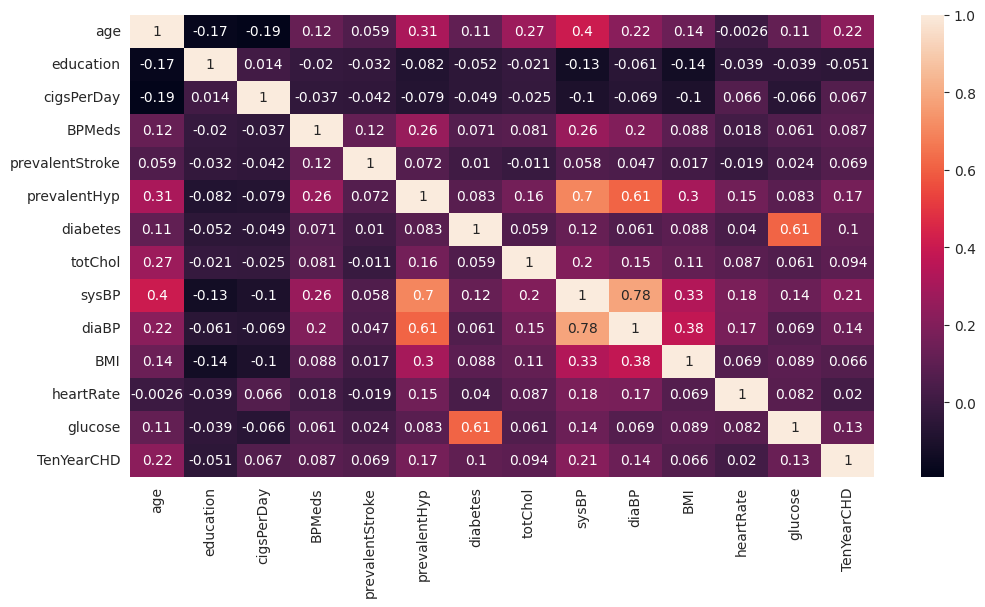

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,6))
corr=df.corr()
sns.heatmap(corr,annot=True)

##### 1. Why did you pick the specific chart?

I have plotted correlation heatmap to find out the correlation between the features with each other

##### 2. What is/are the insight(s) found from the chart?

From the graph it can be analysed that:
* Except **education** all columns have **positive corelation** with **TenYearCHD** and age column has shown more correlation.
* SysBp,diaBP and prevalentHYP and BPMeds have very strong correlation with each other
* BMI also have good correlation with SysBp,diaBP and prevalentHYP
* Age feature also have good correlation with SysBp,diaBP,prevalentHYP and totChol
* Education have negative correlation with almost all the columns
* cigPerDay have negative correlation with glucose and sysBP and BMI


#### Chart - 15 - Pair Plot

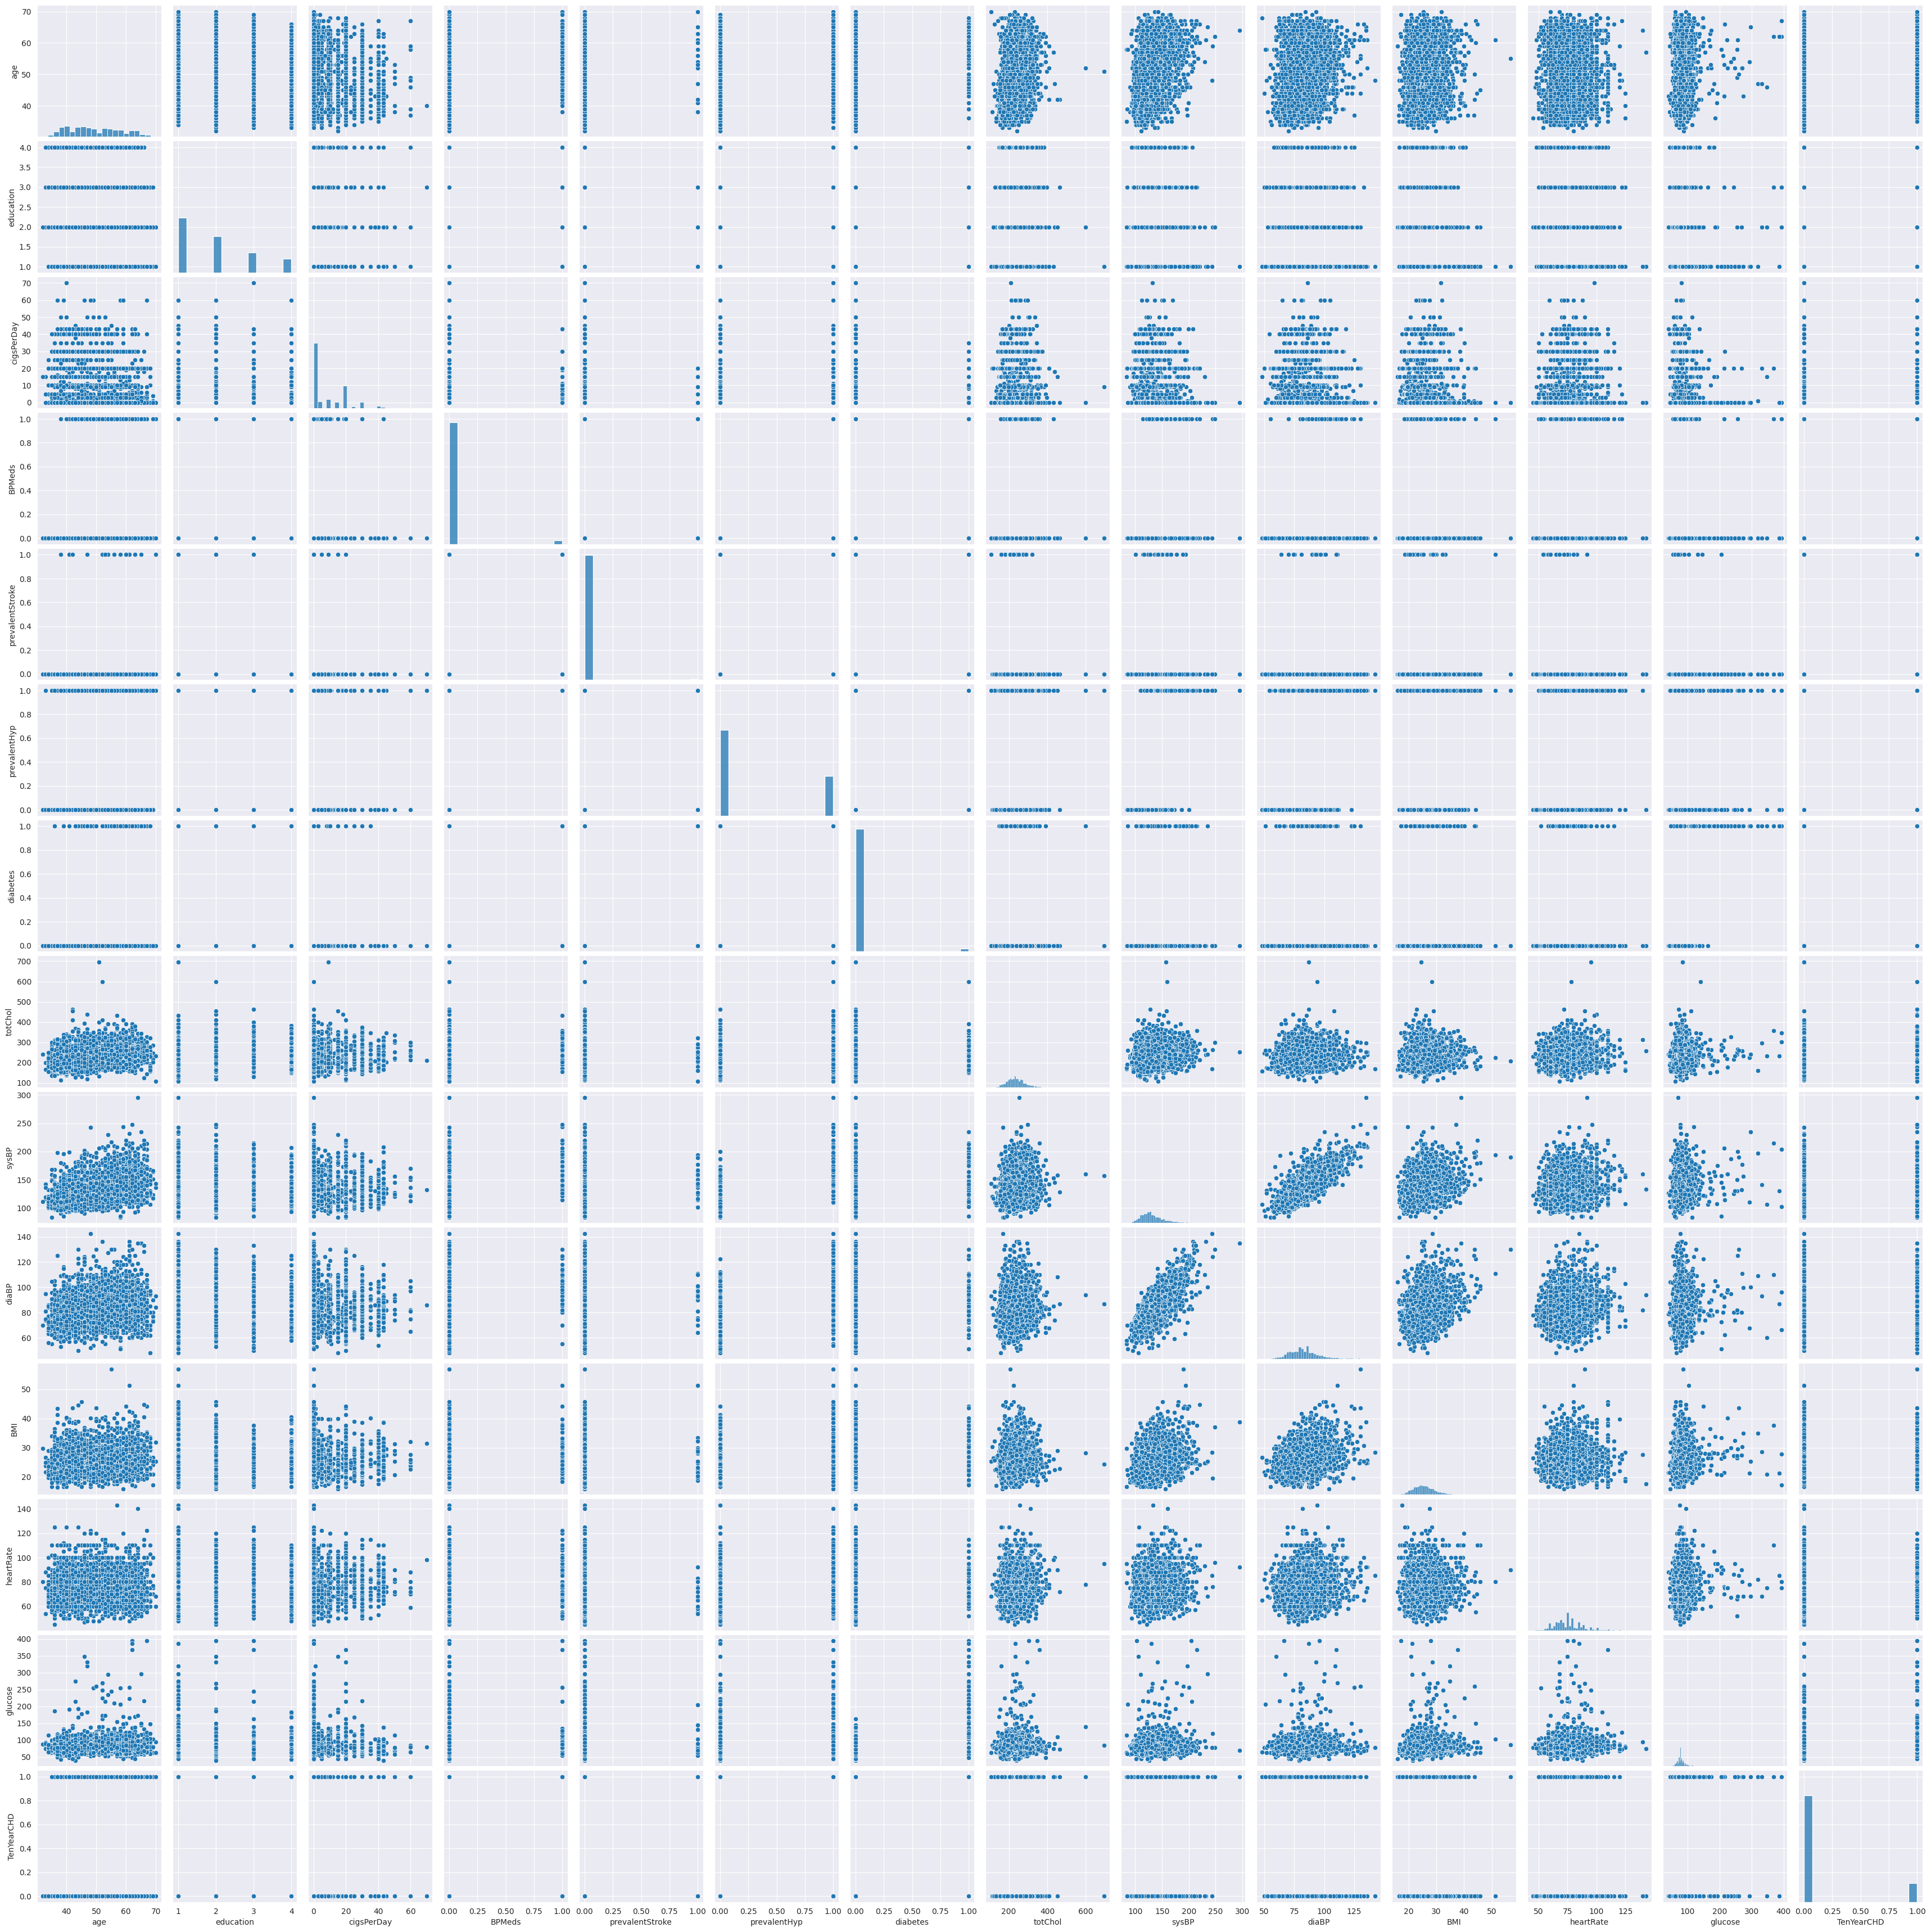

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()


##### 1. Why did you pick the specific chart?

I have plotted pairplot to visvalize the relation between the variables with
each other

##### 2. What is/are the insight(s) found from the chart?

* SysBP and diaBP have good relationship with each other
* age have good raltion with all the features

In [ ]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

###***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* Null Hypothesis(H0) :- There is no reationship between age and CHD
* Alternative Hypothesis(H1) :- Age is an important factor for CHD

* Null Hypothesis(H0) :- There are more males than females in our data set
* Alternative Hypothesis(H1) :- There are more females than males

* Null Hypothesis(H0) :-  There is no reationship between sysBP and diaBP
* Alternative Hypothesis(H1):-There is good reationship between sysBP and diaBP

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis(H0) :- There is no reationship between age and CHD

Alternative Hypothesis(H1) :- Age is an important factor for CHD

#### 2. Perform an appropriate statistical test.

In [ ]:
import scipy.stats as stats

# Perform hypothesis testing
contingency_table = pd.crosstab(df['age'], df['TenYearCHD'])
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
alpha = 0.05

# Output the result
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between age and TenYearCHD.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between age and TenYearCHD.")

print("P-value:", p_value)


Reject the null hypothesis. There is a significant relationship between age and TenYearCHD.
P-value: 8.20034951967931e-25


##### Which statistical test have you done to obtain P-Value?

I have used **chi 2** to perform hypothesis testing

##### Why did you choose the specific statistical test?

In order to find out the association between the variables

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis(H0) :- There are more males than females in our data set
* Alternative Hypothesis(H1) :- There are more females than males

#### 2. Perform an appropriate statistical test.

In [ ]:
import statsmodels.api as sm

# Define the observed proportions
observed_proportions = np.array([0.56, 0.44])  # [proportion of females, proportion of males]

# Specify the null proportion
null_proportion = 0.5  # Assuming an equal proportion of males and females

# Calculate the number of females and males
num_females = observed_proportions[0] * len(data)
num_males = observed_proportions[1] * len(data)

# Perform the one-sample proportion test
zstat, pval = sm.stats.proportions_ztest([num_females, num_males], [len(data), len(data)], null_proportion)

# Print the results
if pval < 0.05:
    print("Reject the null hypothesis. There are more females than males in the dataset.")
else:
    print("Fail to reject the null hypothesis. There are more males than females in the dataset.")



Reject the null hypothesis. There are more females than males in the dataset.


##### Which statistical test have you done to obtain P-Value?

I have used the **one-sample proportion z-test** to obtain the p-value.

##### Why did you choose the specific statistical test?

 The one-sample proportion z-test is used to compare a sample proportion to a specified population proportion.Here I comppared the observed proportions of males and females with null proportion (which is assumed to be 0.5 i.e equal proportion of males and females)

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


* Null Hypothesis(H0) :-  There is no reationship between sysBP and diaBP
* Alternative Hypothesis(H1):-There is good reationship between sysBP and diaBP

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Perform the Pearson correlation test
corr_coeff, p_value = stats.pearsonr(df['sysBP'], df['diaBP'])

# Print the results
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant relationship between sysBP and diaBP.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between sysBP and diaBP.")
print("P-value:", p_value)

Reject the null hypothesis. There is a significant relationship between sysBP and diaBP.
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

In order to find out the relationship between two variables (sysBP and diaBP), i have used the **Pearson correlation coefficient** to test the hypothesis. The Pearson correlation coefficient measures the strength and direction of the linear relationship between two variables.

##### Why did you choose the specific statistical test?

in order to find out the correlation coefficient and P vlaue between the two features,i am using Pearson method.It helps us to find out the  Corelation coeficient value which ranges from -1 and 1. A Correlation value of 1 means perfect positive correlation, whereas correlation value of -1 means strong negative relationship and a correlation value of 0 means no relationship between the features.
Also the P-value helps us to find out the statistical importance of the correlation.If the p-value is less than singnificance value which is generally taken as 0.05 indicates that the correlation is significant and provides us evidence to reject the null hypothesis

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().any()

age                False
education          False
sex                False
is_smoking         False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool

#### What all missing value imputation techniques have you used and why did you use those techniques?

I have already filled all the missing values during EDA process

### 2. Handling Outliers

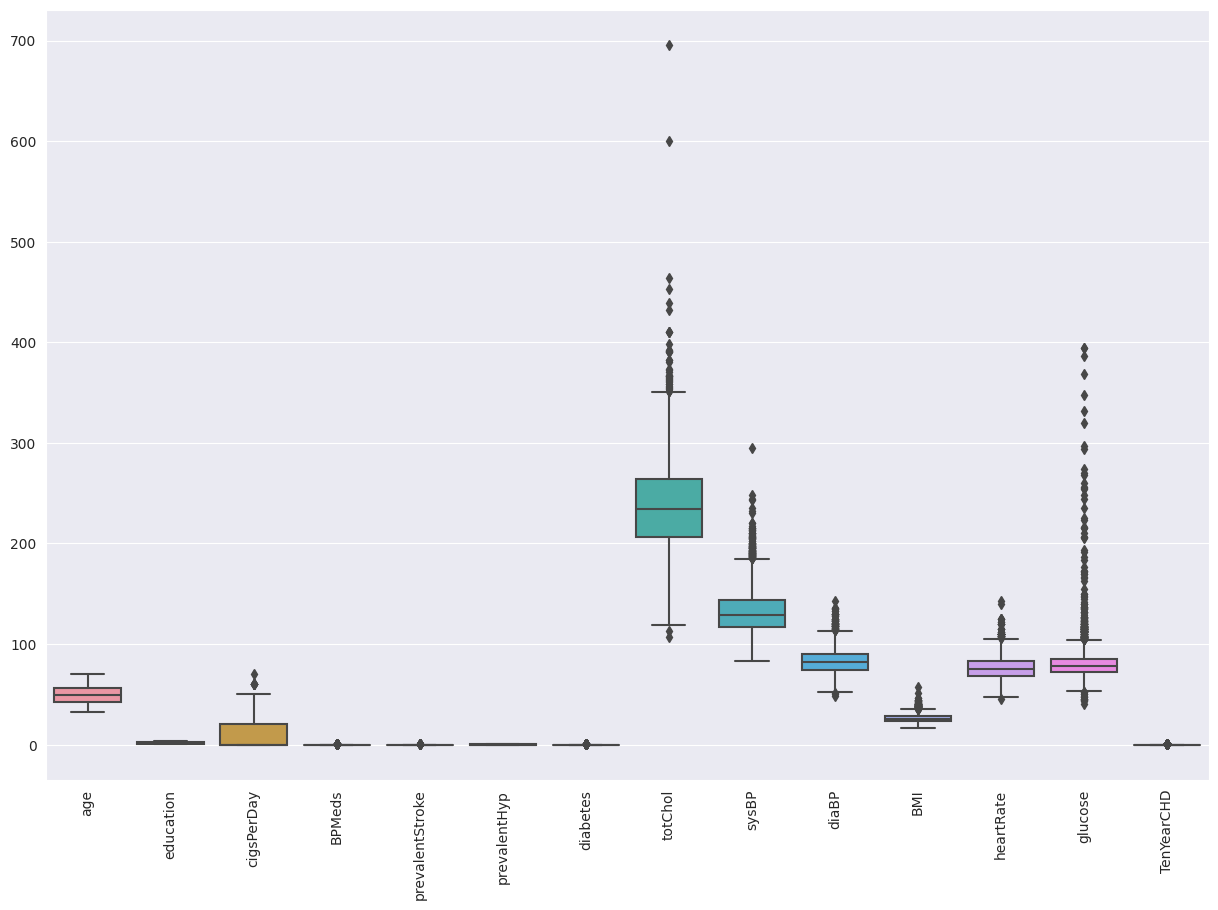

In [ ]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(15,10))
sns.boxplot(df)
plt.xticks(rotation='vertical')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Since dataset is health related so it is not good to remove outliers

### 3. Categorical Encoding

In [ ]:
#categorical columns
categorical_col

['sex', 'is_smoking']

In [ ]:
df.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [ ]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['sex'])                        #0 means Female and 1 means Male
df['Is_smoking'] = le.fit_transform(df['is_smoking'])          #1 means yes and 0 means No


In [ ]:
#droping the original columns
df.drop(columns=['sex','is_smoking'],axis=1,inplace=True)

In [ ]:
df.head()

age  education  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0   64        2.0         3.0     0.0                0             0   
1   36        4.0         0.0     0.0                0             1   
2   46        1.0        10.0     0.0                0             0   
3   50        1.0        20.0     0.0                0             1   
4   64        1.0        30.0     0.0                0             0   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  \
0         0    221.0  148.0   85.0  25.38       90.0     80.0           1   
1         0    212.0  168.0   98.0  29.77       72.0     75.0           0   
2         0    250.0  116.0   71.0  20.35       88.0     94.0           0   
3         0    233.0  158.0   88.0  28.26       68.0     94.0           1   
4         0    241.0  136.5   85.0  26.42       70.0     77.0           0   

   Sex  Is_smoking  
0    0           1  
1    1           0  
2    0           1  
3    1           1  
4    0           1

#### What all categorical encoding techniques have you used & why did you use those techniques?

There was only 2 categorcial columns present in the dataset and in order to encode them i have used Label Encoder technique to convert them into numerical form

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Calculate pulse pressure using sysBP and diaBP
df['pulse_pressure'] = df['sysBP'] - df['diaBP']

In [ ]:
#extact new feature smoking_status based on the condition
df['smoking_status'] = np.where(df['Is_smoking'] == 0, 0, df['cigsPerDay'])

In [ ]:
#extact new feature diabetes_status based on the condition
df['diabetes_status'] = np.where(df['glucose'] >= 100, 1, 0)

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
#let's calculate the VIF to find Multicolinearity between the features
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df[['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'Sex', 'Is_smoking',
       'pulse_pressure', 'smoking_status', 'diabetes_status']]
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

           Variable        VIF
0               age  41.841000
1         education   4.604280
2        cigsPerDay        inf
3            BPMeds   1.134716
4   prevalentStroke   1.029826
5      prevalentHyp   2.454966
6          diabetes   1.592715
7           totChol  30.882814
8             sysBP        inf
9             diaBP        inf
10              BMI  44.866108
11        heartRate  39.002891
12          glucose  27.453568
13       TenYearCHD   1.289925
14              Sex   2.135998
15       Is_smoking   4.952889
16   pulse_pressure        inf
17   smoking_status        inf
18  diabetes_status   1.768402


Here are many features that have high Multicolinearity let's try to select specific column to reduce VIF:
* let's first remove **cigsPerDay and is_smoking** column as we have **smoking_status**
* Removing **sysBP and diaBP** columns as we have **pulse_pressure**
* Removing **diabetes and glucose** as we have **diabetes_status**
* Removing **tot_chol and BMI** and **heartRate** also as they don't have that much good corelation with target feature

In [ ]:
X=df[['age', 'education', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'TenYearCHD', 'Sex',
       'pulse_pressure', 'smoking_status', 'diabetes_status']]
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

          Variable        VIF
0              age  18.825331
1        education   3.991185
2           BPMeds   1.126694
3  prevalentStroke   1.028174
4     prevalentHyp   2.067132
5       TenYearCHD   1.262175
6              Sex   2.004516
7   pulse_pressure  18.458899
8   smoking_status   1.771626
9  diabetes_status   1.115657


After removing all the Multicolinearity feature now VIF is under control,we can proceed further

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
new_df=df[['age', 'education', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'TenYearCHD', 'Sex',
       'pulse_pressure', 'smoking_status', 'diabetes_status']]


##### What all feature selection methods have you used  and why?

After removing all the columns that were showing high Multicollinearity by using VIF method.


##### Which all features you found important and why?

Feature like **'age', 'education', 'BPMeds', 'prevalentStroke','prevalentHyp', 'Sex','pulse_pressure', 'smoking_status', 'diabetes_status' are important for predicting 'TenYearCHD'**

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
#let's check skewness of continous columns
new_df[['age','pulse_pressure','smoking_status']].skew()

age               0.225796
pulse_pressure    1.412382
smoking_status    1.226990
dtype: float64

Since skewness in all the columns is very less so i will use log transformation

In [ ]:
#use log transformation
new_df['age']=np.log(new_df['age']+1)
new_df['pulse_pressure']=np.log(new_df['pulse_pressure']+1)
new_df['smoking_status']=np.log(new_df['smoking_status']+1)

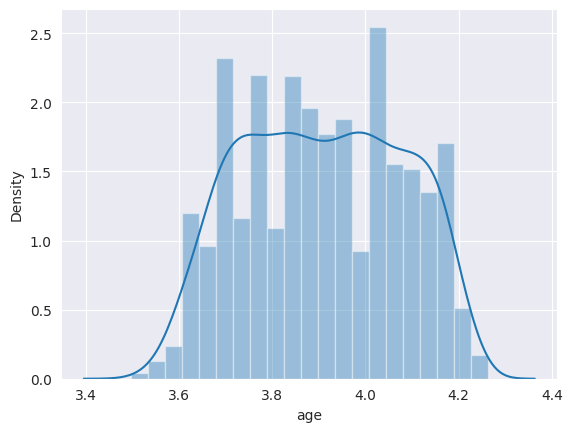

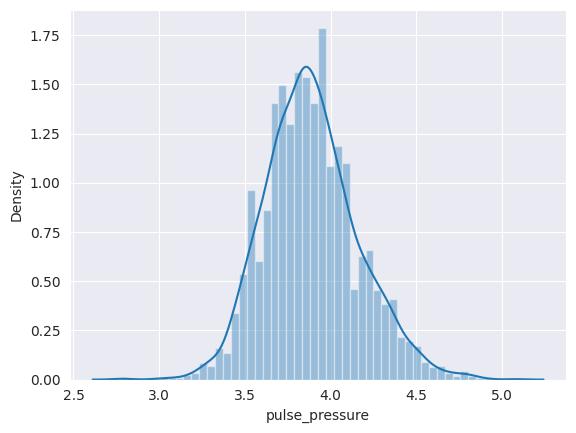

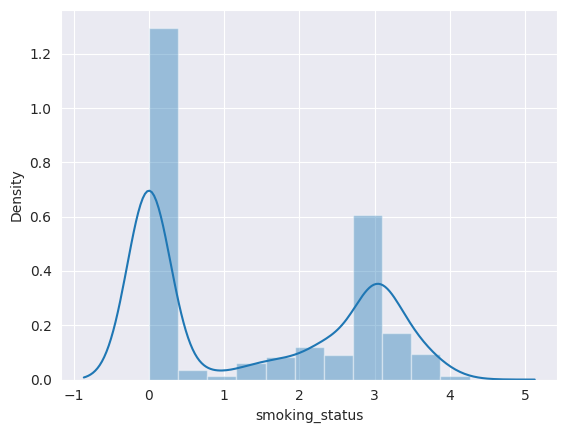

In [ ]:
for col in ['age','pulse_pressure','smoking_status']:
  sns.distplot(new_df[col])
  plt.show()

### 6. Data Scaling

In [ ]:
# Scaling your data
#before scaling let's find out the dependent and independent features
x=new_df.drop(columns='TenYearCHD')
y=new_df[['TenYearCHD']]

print(x.shape)
print(y.shape)

(3390, 9)
(3390, 1)


In [ ]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#fit and transform
x=sc.fit_transform(x)

##### Which method have you used to scale you data and why?

I have used **StandardScaler** from the scikit-learn library for **scaling data**. This method transforms the data such that it has a **mean** of **0** and a **standard deviation of 1**.It helps to **bring all features** onto a **similar scale**.When features have significantly different scales, it can lead to biased model training or result in features with larger scales dominating the learning process.



### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

##### What data splitting ratio have you used and why?

 I have choosen **80-20 ratio**. By allocating 80% of the data to the training set, we will get enough data to train the model and capture patterns and relationships in the data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [ ]:
#Distribution of target feature
print('Distribution of Dataset before sampling:\n',y.value_counts())

Distribution of Dataset before sampling:
 TenYearCHD
0             2879
1              511
dtype: int64


Here we can see that our data is **imbalanced** as No. of people prone to CHD is very less so if i use this data to train my model then it will be **biased**,so i have to treat the imbalanced data first

In [ ]:
# Handling Imbalanced Dataset using SMOTE Method
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0,sampling_strategy='minority')
x_sm,y_sm=sm.fit_resample(x,y)

In [ ]:
#Distribution after doing oversampling
print('Distribution of Dataset after oversampling:\n',y_sm.value_counts())

Distribution of Dataset after oversampling:
 TenYearCHD
0             2879
1             2879
dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used **SMOTE(Synthetic Minority Over-Sampling Technique)** to handle my class imbalance. SMOTE **generates synthetic samples of the minority class** to increase its representation in the dataset

In [ ]:
#splitting data again
x_train_sm,x_test_sm,y_train_sm,y_test_sm=train_test_split(x_sm,y_sm,test_size=0.2,random_state=0)

## ***7. ML Model Implementation***

In [ ]:
#Before Model Development let's define a function which trains model and calculates evaluation metrices
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Calculate ROC curve and AUC
    y_train_probs = model.predict_proba(X_train)[:, 1]
    y_test_probs = model.predict_proba(X_test)[:, 1]
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_probs)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_probs)
    roc_auc_train = auc(fpr_train, tpr_train)
    roc_auc_test = auc(fpr_test, tpr_test)

    # Print evaluation metrics
    print("Training Set:")
    print("Accuracy: {:.4f}".format(train_accuracy))
    print("Precision: {:.4f}".format(train_precision))
    print("Recall: {:.4f}".format(train_recall))
    print("F1-Score: {:.4f}".format(train_f1))
    print("AUC: {:.4f}".format(roc_auc_train))
    print("\nTest Set:")
    print("Accuracy: {:.4f}".format(test_accuracy))
    print("Precision: {:.4f}".format(test_precision))
    print("Recall: {:.4f}".format(test_recall))
    print("F1-Score: {:.4f}".format(test_f1))
    print("AUC: {:.4f}".format(roc_auc_test))

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, label='Train ROC Curve (AUC = {:.2f})'.format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label='Test ROC Curve (AUC = {:.2f})'.format(roc_auc_test))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


ROC is a chart between fpr and tpr at different threshold

### ML Model - 1 Logistic Regression

Training Set:
Accuracy: 0.6772
Precision: 0.6737
Recall: 0.6746
F1-Score: 0.6741
AUC: 0.7405

Test Set:
Accuracy: 0.6623
Precision: 0.6774
Recall: 0.6694
F1-Score: 0.6734
AUC: 0.7246


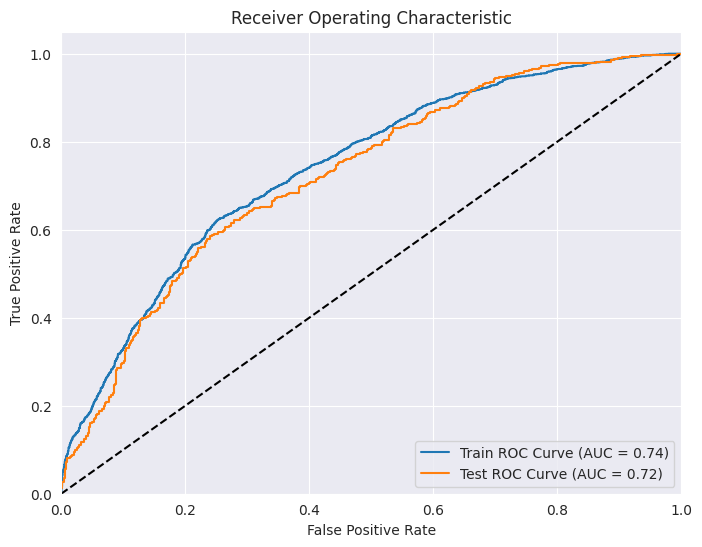

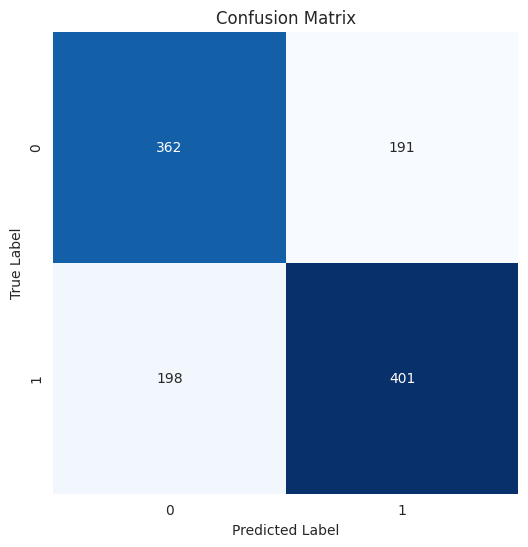

In [ ]:
#Logistic Regression
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(fit_intercept=True, penalty='l2',max_iter=10000,random_state=0)
# Fit, predict and evaluate the model
evaluate_model(clf,x_train_sm, y_train_sm, x_test_sm, y_test_sm)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

After applying logistic model on the datasets following were the result:
* The Model achieved a **Accuracy**  of **67.7%** on training and **66.2%**  on the test dataset means that around 67% the model predicted the target variable correctly and also the Model obtained ** Precision**  of ** 67.3%**  on training and ** 67.7%**  on test data.Also the model was able to correctly identify actual positive i,e **Recall** **67.3%** on training sample and **66.9%** on test sample.Also 67.2% and 68.11 was the obtained F1 score on training and test sample.The **AUC value** of **74%** on trainig and **72.8%** on tets was obtained
* from the confusion matrix it can be seen that out of **1152**  the model is able to predict **763**  correctly, which is not a good result so we have to maximize it

Overall the model performance was moderate as this is health realted problem so we have to build more accurate model

#### 2. Cross- Validation & Hyperparameter Tuning

Training Set:
Accuracy: 0.6772
Precision: 0.6737
Recall: 0.6746
F1-Score: 0.6741
AUC: 0.7405

Test Set:
Accuracy: 0.6623
Precision: 0.6774
Recall: 0.6694
F1-Score: 0.6734
AUC: 0.7246


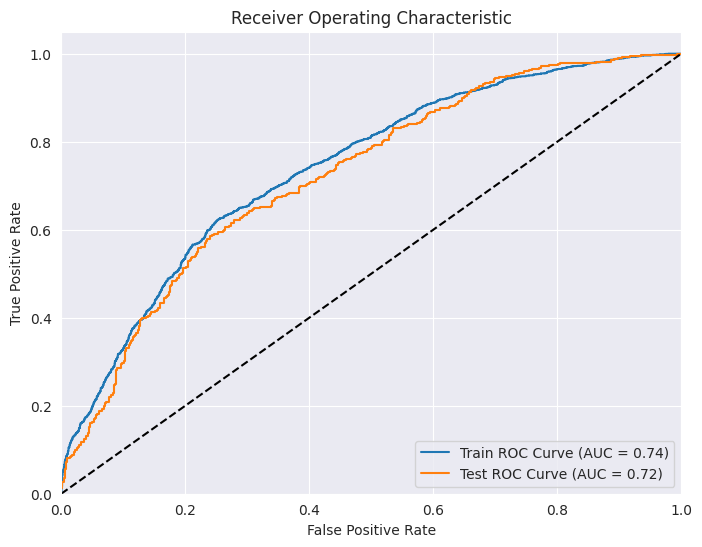

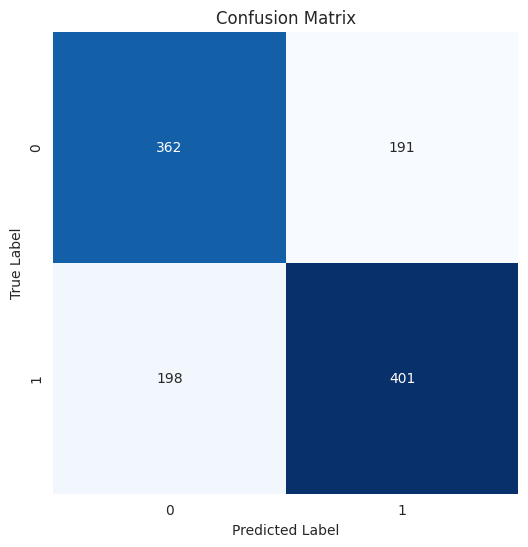

best param: {'C': 1, 'penalty': 'l2'}
best score: 0.6765081339014227
best estimator: LogisticRegression(C=1)


In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model
LR = LogisticRegression()

# Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'] }

# Fit the Algorithm
grid_search = GridSearchCV(LR, param_grid, cv=5)
evaluate_model(grid_search,x_train_sm, y_train_sm, x_test_sm, y_test_sm)

# Get the best hyperparameters and model
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)
best_model = print('best estimator:',grid_search.best_estimator_)



##### Which hyperparameter optimization technique have you used and why?

 have used GridSearchCV technique for hyperparameter tuning . It systematically searches through a predefined set of hyperparameters and evaluates the model's performance for each combination using cross-validation and gives out best possible combination of the parameters

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There was not **no such improvement** in the model after tunning the hyperparameters.So i have go now for some complex model

### ML Model - 2 Random Forest

Training Set:
Accuracy: 0.7660
Precision: 0.7553
Recall: 0.7798
F1-Score: 0.7674
AUC: 0.8510

Test Set:
Accuracy: 0.7396
Precision: 0.7496
Recall: 0.7496
F1-Score: 0.7496
AUC: 0.8102


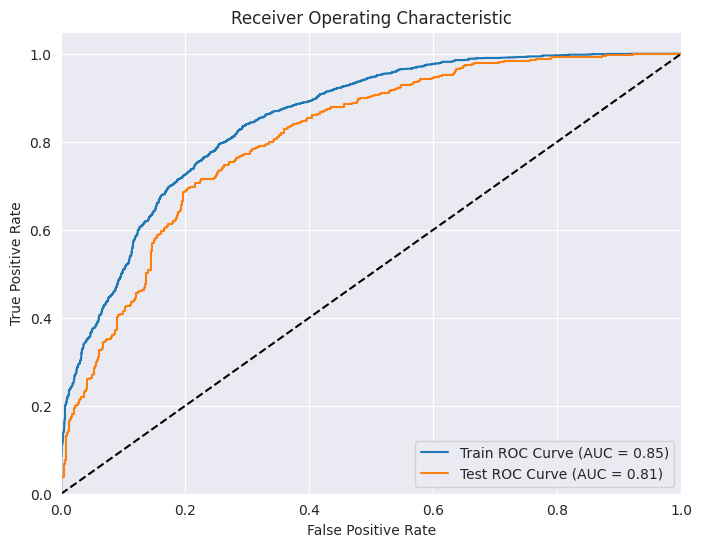

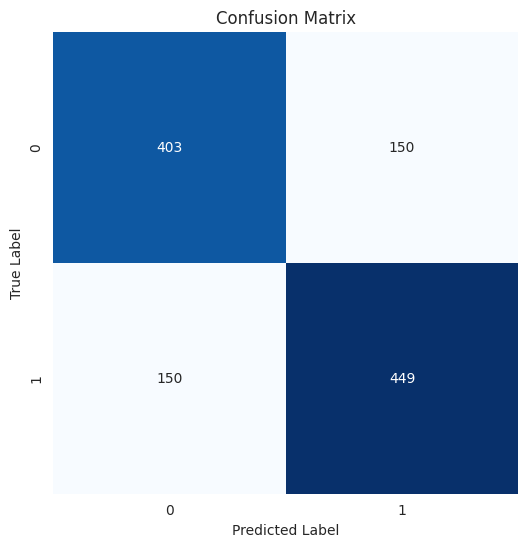

In [ ]:
# ML Model - 2 Implementation
#importing the model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,max_depth=6,random_state=0)

# Fit and predict the model
evaluate_model(rfc, x_train_sm, y_train_sm, x_test_sm, y_test_sm)


After applying Random Forest on the datasets following were the result:

The Model achieved a **Accuracy of 76.6%** on training sample and **73.9%** on the test sample means that around 74% the model predicted the target variable correctly in test sample and also the Model obtained **Precision of 75.5%** on training and **74.9%** on test sample.Also the model was able to correctly identify actual positive i,e **Recall of 77.9%** on training sample and **74.96%** on test sample.Also **76.7% and 74.9%** was the obtained **F1 score** on training and test sample.The **AUC value** of **85%** on trainig and **81.02%** on tets was obtained


from the confusion matrix it can be seen that out of **1152** the model is able to predict **852** correctly, which is not a good result so we have to maximize it


Overall the model performance was moderate and we have to further analyse and optimize our model for better performance

#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Training Set:
Accuracy: 0.8856
Precision: 0.8660
Recall: 0.9096
F1-Score: 0.8873
AUC: 0.9616

Test Set:
Accuracy: 0.8090
Precision: 0.8112
Recall: 0.8247
F1-Score: 0.8179
AUC: 0.8869


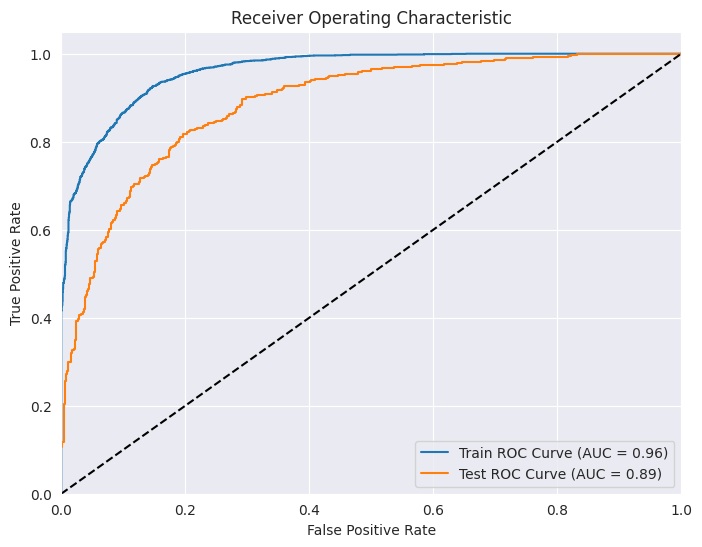

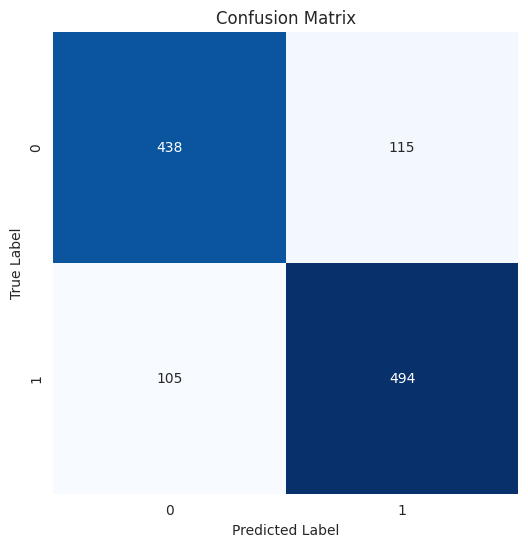

best param: {'max_depth': 10, 'n_estimators': 450}
best score: 0.8846531335086991
best estimator: RandomForestClassifier(max_depth=10, n_estimators=450, random_state=0)


In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
ran_forest=RandomForestClassifier(random_state=0)
param_grid={
    'n_estimators': [300,400,450,500],
    'max_depth': [6,8,10]
}
rf_grid_search=GridSearchCV(ran_forest,param_grid,scoring='roc_auc',n_jobs=-1,cv=5,verbose=2)
# Fit and predict the model
evaluate_model(rf_grid_search, x_train_sm, y_train_sm, x_test_sm, y_test_sm)
# Retrieve the best hyperparameters and best score
best_params = print('best param:',rf_grid_search.best_params_)
best_score = print('best score:',rf_grid_search.best_score_)
best_model = print('best estimator:',rf_grid_search.best_estimator_)

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV technique for hyperparameter tuning . It systematically searches through a predefined set of hyperparameters and evaluates the model's performance for each combination using cross-validation and gives out best possible combination of the parameters

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After applying hyperparamter the model has improved the performance with higher accuracy,precision,recall,F1-score and AUC on both the training and test sets.but model has shown around 96% AUC score on trainig and only 89% on test and around 932 are correctly classified


### ML Model - 3  KNN

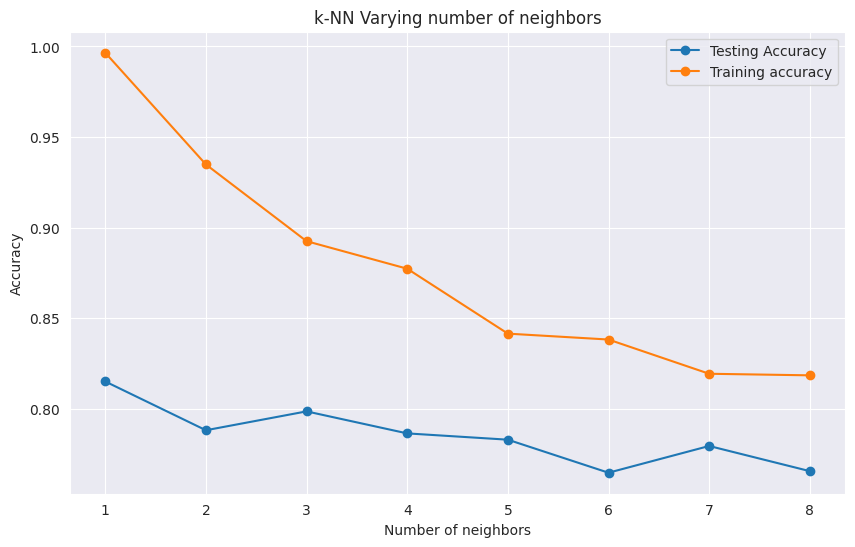

In [ ]:
# Import KNeighborsClassifier
#let's first determine the value of k
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model
    knn.fit(x_train_sm, y_train_sm)

    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train_sm, y_train_sm)

    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test_sm, y_test_sm)
# Generate plot
plt.figure(figsize=(10,6))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy',marker='o')
plt.plot(neighbors, train_accuracy, label='Training accuracy',marker='o')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Let's choose a value of 6

Training Set:
Accuracy: 0.8383
Precision: 0.8168
Recall: 0.8680
F1-Score: 0.8416
AUC: 0.9272

Test Set:
Accuracy: 0.7648
Precision: 0.7645
Recall: 0.7913
F1-Score: 0.7777
AUC: 0.8497


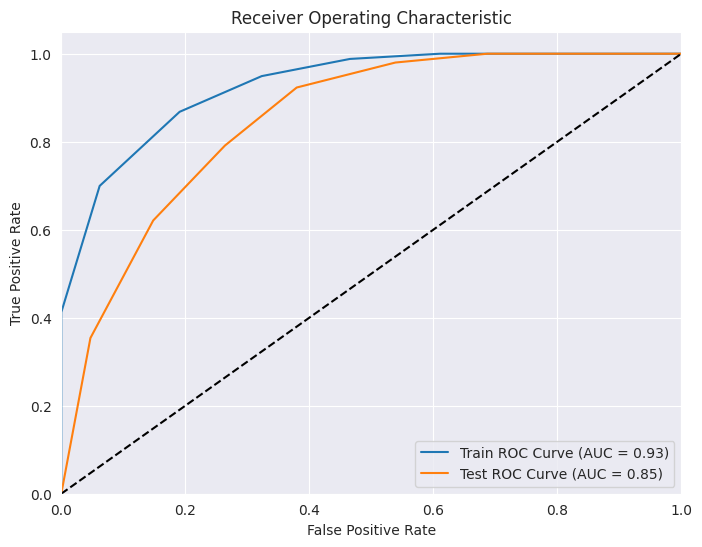

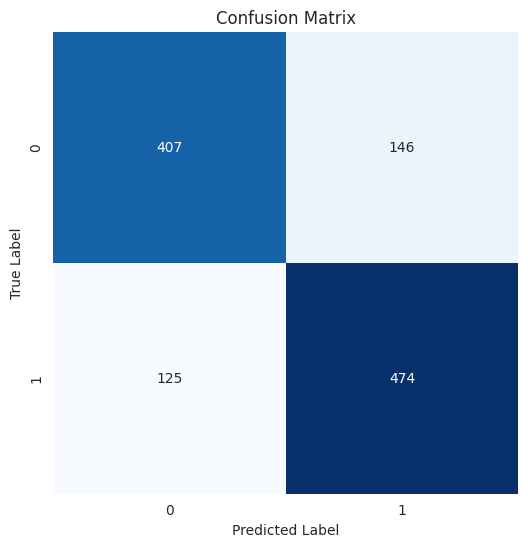

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=6)
#fiiting,predicting and evaluating the model
evaluate_model(knn, x_train_sm, y_train_sm, x_test_sm, y_test_sm)


The Model achieved a **Accuracy of 83.8%** on training sample and **76.4%** on the test sample means that around 77% the model predicted the target variable correctly in test sample and also the Model obtained **Precision of 81.6% on training and 76.4%** on test sample.Also the model was able to correctly identify actual positive i,e **Recall of 86.8%** on training sample and **79.13%** on test sample.

The model has obtained an **AUC** of **92.7%** on training and **85%** of test data,which shows that model has not performed good on the test sample.Let's now hypertune the model for best performance
and out of **1152** values the model has **881** correctly classified

#### 2. Cross- Validation & Hyperparameter Tuning

Training Set:
Accuracy: 0.9965
Precision: 0.9965
Recall: 0.9965
F1-Score: 0.9965
AUC: 0.9965

Test Set:
Accuracy: 0.8151
Precision: 0.7915
Recall: 0.8748
F1-Score: 0.8311
AUC: 0.8126


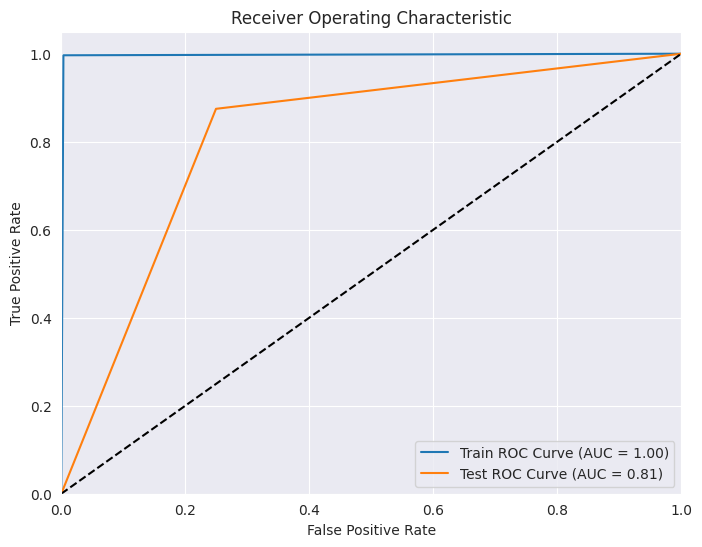

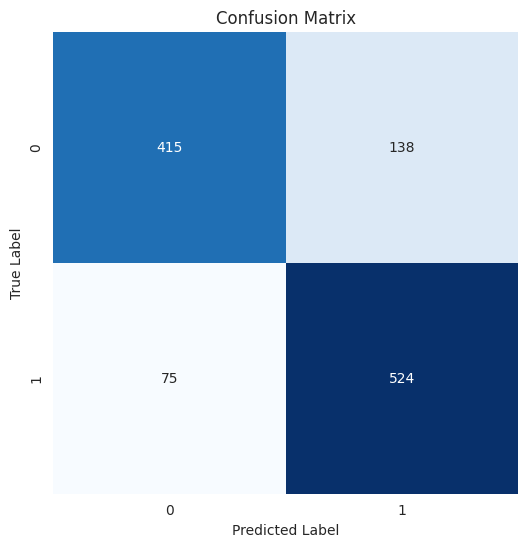

best param: {'n_neighbors': 1}
best estimator: KNeighborsClassifier(n_neighbors=1)


In [ ]:
#Import GridSearchCV
from sklearn.model_selection import GridSearchCV
#defining parameters
param_grid = {'n_neighbors':np.arange(1,50)}
knn_grid_search=GridSearchCV(knn,param_grid,cv=5)
# Fit and predict the model
evaluate_model(knn_grid_search, x_train_sm, y_train_sm, x_test_sm, y_test_sm)
# Retrieve the best hyperparameters and best score
best_params = print('best param:',knn_grid_search.best_params_)
best_model = print('best estimator:',knn_grid_search.best_estimator_)

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV technique for hyperparameter tuning . It systematically searches through a predefined set of hyperparameters and evaluates the model's performance for each combination using cross-validation and gives out best possible combination of the parameters

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After applying hyperparamter the model has improved the performance with higher accuracy,precision,recall,F1-score and AUC on both the training and test sets.but model has shown around 99% AUC score on trainig and only 81% on test that means model has overfitted.And model has correctly classified 939 values


## Model 4 Naive Bayes

Training Set:
Accuracy: 0.6170
Precision: 0.7172
Recall: 0.3737
F1-Score: 0.4913
AUC: 0.7163

Test Set:
Accuracy: 0.5781
Precision: 0.6890
Recall: 0.3439
F1-Score: 0.4588
AUC: 0.6914


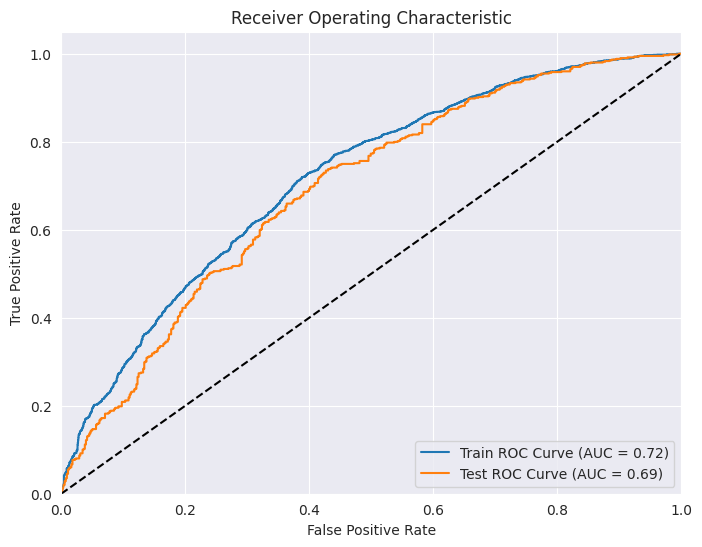

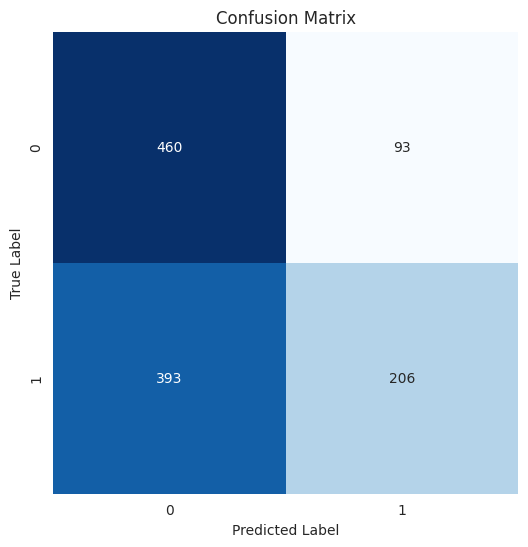

In [ ]:
#importing model
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
#fitting,predicting and evaluating the model
evaluate_model(nb, x_train_sm, y_train_sm, x_test_sm, y_test_sm)

The model has shown very poor performance with very low accuracy,precision,recall,F1-score and AUC on both the training and test sets.

## Model 5 XGboost

Training Set:
Accuracy: 0.8092
Precision: 0.8143
Recall: 0.7961
F1-Score: 0.8051
AUC: 0.8991

Test Set:
Accuracy: 0.7969
Precision: 0.8047
Recall: 0.8047
F1-Score: 0.8047
AUC: 0.8765


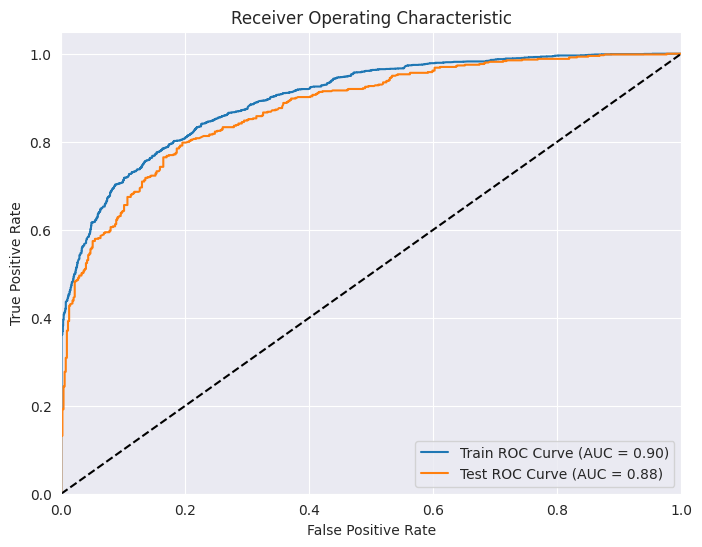

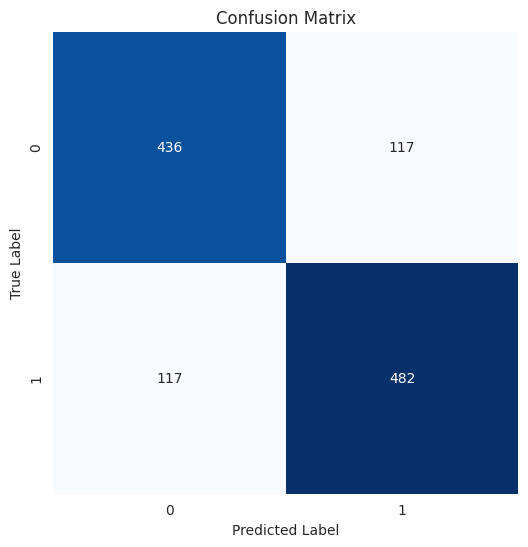

In [ ]:
#import the model
from xgboost import XGBClassifier
xgb=XGBClassifier(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    objective='binary:logistic',
    random_state=42
)

#fitting,predicting and evaluating the model
evaluate_model(xgb, x_train_sm, y_train_sm, x_test_sm, y_test_sm)

The  model XGboost has shown very good performance with higher accuracy,precision,recall,F1-score and AUC on both the training and test sets.The model has obtained 90% AUC on training and 88% on test sample which is pretty good as compared to other models.Also the model was able to predict 918 out of 1152 in test sample and in order to further optimize the model i will hypertune the model

#### 2. Cross- Validation & Hyperparameter Tuning

Training Set:
Accuracy: 0.9440
Precision: 0.9856
Recall: 0.9000
F1-Score: 0.9409
AUC: 0.9876

Test Set:
Accuracy: 0.8915
Precision: 0.9357
Recall: 0.8497
F1-Score: 0.8906
AUC: 0.9440


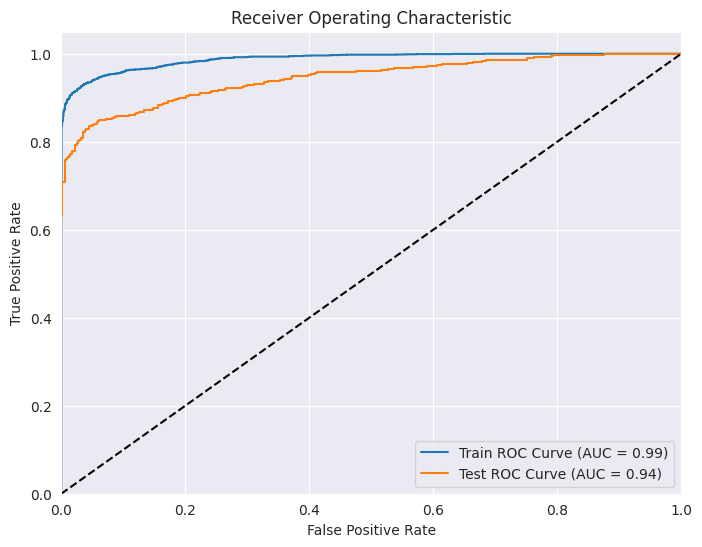

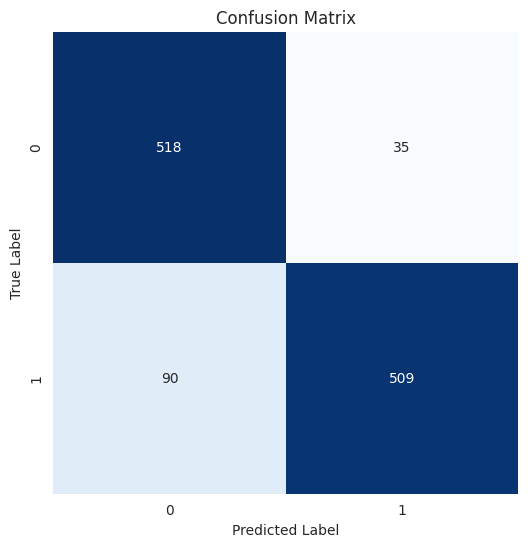

best param: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
best estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)


In [ ]:
#importing GridSearchCv
from sklearn.model_selection import GridSearchCV
xgb = XGBClassifier(random_state=0)
#definig parameters
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2]
}
# Perform grid search
xg_grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=3)
# Fit and predict the model
evaluate_model(xg_grid_search, x_train_sm, y_train_sm, x_test_sm, y_test_sm)
# Retrieve the best hyperparameters and best score
best_params = print('best param:',xg_grid_search.best_params_)
best_model = print('best estimator:',xg_grid_search.best_estimator_)

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV technique for hyperparameter tuning . It systematically searches through a predefined set of hyperparameters and evaluates the model's performance for each combination using cross-validation and gives out best possible combination of the parameters

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

By using the GridSearch Cv as a hyperparamter tunning ,the model performed very higher accuracy,recall,F1 score and AUC value of 99% on training and 94% on test.The best paramters was found to be 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300 and around **1027** patients are correctly classified out of **1152**

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Some of the important metrics which can consider for this type of problems are as follow:
* Accuracy: The Overall Accuracy gives us the idea of overall correctness of then prediction
*Sensitivity/Recall:Recall or True positive rate is very important for health-care related application.It helps us to find out the total proportion of the actual positive cases(i.e patient with cardiovascular disease) that has been correctly identified by the model.
* Precision: Precision helps us to find out of all the truly positive cases predicted by the model, how many are actually truly positive cases.It is very helpful for health-care to ensure that the predicted cases are accurate.
* F1-Score: The F1-Score gives us the harmonic mean of precision and recall, providing a balanced measure of both metrics.
* Area Under the ROC Curve (AUC-ROC): AUC-ROC helps us to find out how much the model is able to distinguish between positive and negative instances across various classification thresholds. It provides an overall assessment of the model's discrimination power.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the performance of all the models, i have selected XGBoost model as the final prediction model. The XGBoost model outperformed the other models in several key aspects, making it the preferred choice for prediction.

The XGboost model with hyperparamter tunning ,has  performed very well with higher accuracy,recall,F1 score and AUC value of 99% on training and 94% on test.The best paramters was found to be 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200.

Considering the model's strong predictive performance and consistency across evaluation metrics, the XGBoost model is the preferred choice as the final prediction model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The Model can be explained in two ways:

1. **Globally** :

This is the overall explanation of model behavior. It shows us a big picture view of the model, and how features in the data collectively affect the result.
e.g **Feature importance**

2. **Locally** :

This tells us about each instance and feature in the data individually (kind of like explaining observations seen at certain points in the model), and how features individually affect the result.e.g **Lime** ,**Shap**

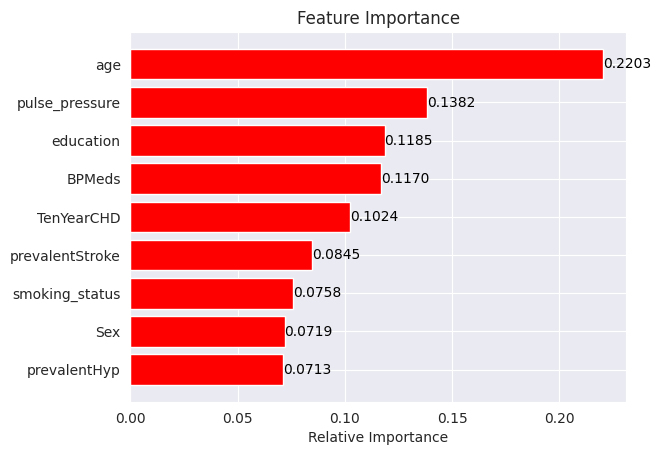

In [ ]:
# Plotting the barplot to find out which feature is contributing the most
#Defining model
model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=7)

# Train XGBoost model
model.fit(x_train_sm, y_train_sm)

# Get the feature importance scores
importance = model.feature_importances_
indices = np.argsort(importance)

# Plot the feature importance using a horizontal bar plot
features = new_df.columns
plt.title('Feature Importance')
plt.barh(range(len(indices)), importance[indices], color='red', align='center')

# Add numeric values on top of the bars
for i, v in enumerate(importance[indices]):
    plt.text(v, i, f'{v:.4f}', color='black', va='center')

plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



I have applied Feature importance method to find out what are the features that are important for the prediction of the target feature:

it can be seen that **age** feature is contributing the most around **22.8%** followed by the **pulse_pressure** **13.8%** and then education around **11.85%** and so on

# **Conclusion**

### EDA CONCLUSION

EDA helps us to extract useful insights from the data.Following were some of the insights drawn:

* In our data set around **57%** of the patients's gender was Female and around **49.8%** of the patients are smokers.**18.5%** of the Male patients and **12.4%** of Female patients and around **16.3%** of the patients who are **smokers** and **13.8%** of the **non-smoker** patients have chances of getting the disease
*only **2.9%** of the patient are taking BP medicines and only **0.6%** of the patient has prevalent Stroke and
around **31.5%** of the patients has prevalent Hypertension and only **2.6 %** of the patients has Diabetes and Only **15.1%** of the patients has a chance of getting cardio-vascular disease in next 10 years
* People at **Education Level 1** have more chances of getting the disease than other Education Level
* Majority of the patient's age were in the range of **40-50** and the chances of suffering with CHD increase with increase in age
* Patients suffering with the **prevalant stroke** have more chances of suffering with the disease
*  Daibetes patients are having more glucose level and are more prone to CHD
* Patients having Cholestrol greater than **300 mg/dl** and less than **150 mg/dl** are having more chances of getting the disease'
* Patients having systolic Bp **greater than 150 mmhg** and **less than 110 mmhg** are having more chances of getting the disease
* Patients having dia-Bp greater than **100 mmhg** and less than **70 mmhg** are having more chances of getting the disease
* There is not a specific BMI which can lead to CHD but it can seen that patients with overweight and obese conditions i.e **BMI >25** are have little more risk of getting CHD in future
* Patients having heart rate more than **90** are having little more risk of getting the disease

## ML Conclusion

I have implemented **Logistic Regression,Random forest,KNN,Naive Bayes and XGBoost model** on my data. Based on the performance of all the models, i have selected XGBoost model as the final prediction model. The XGBoost model outperformed the other models in several key aspects, making it the preferred choice for prediction.KNN has also shown good performance on training data with 100% AUC score but only 81% on test sample data that means model has overfitted.

The XGboost model with hyperparamter tunning ,has performed very well with higher accuracy,recall,F1 score and AUC value of **99%** on training and **94%** on test.The best paramters was found to be **'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300**.
Out of **1152** patients our optimal model is correcly predicting **518** of **class 0** and **509** of **class 1** patients, other **90** and **35** are **FN and FP cases**.
I have applied Feature importance method to find out what are the features that are important for the prediction of the target feature:

it can be seen that **age** feature is contributing the most around **22.8%** followed by the **pulse_pressure 13.8%** and then **education around 11.85%** and so on

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***